In [1]:
from scipy import stats
from scipy.stats import pearsonr
from scipy.spatial import distance
import pandas as pd
import numpy as np
from matplotlib import pyplot 
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance


In [2]:
!pip install seaborn
import seaborn as sns

You should consider upgrading via the '/Users/luna/anaconda3/bin/python -m pip install --upgrade pip' command.


### This notebook has 3 parts. 
---sweden
### 1. Part one - policies
    1.1 Reading in the policy data of countries
    1.2 Extracting policy scores
    1.3 Preparing policy data frame
    1.4 Independent variable
    1.5 Statistics of policies
    1.6 Sub-indicators
### 2. Part two   - editorials 
    2.1 Reading in the editorship data
    2.2 Preparing editorship data for 2020
    2.3 Daily ratios 2020
    2.4 Preparing editorship data for 2019

### 3. Part three -  Experiments
    3.1 EXPERIMENT 1: Weekly normalizated data
    00. Experiment 0: Yearly normalized data
    3.2 EXPERIMENT 2: Weekly and yearly normalized data
    3.3 Outlier detection and removal
        3.3.1 EXPERIMENT 3: Outlier detection & removal for 2019 [ for weekly normalized data ]
        3.3.2 EXPERIMENT 4: Outlier detection & removal for 2019 [ for weekly&yearly normalized data ]
    3.4 EXPERIMENT 5: Moving average smoothing 2019/2020 
    3.5 Feature selection - dimensionality reduction
       3.5.1 Correlation heatmap
           Jensen shanon
           Earthmover
       3.5.2 PCA
           3.5.2.1 pca - built in library
           3.5.2.2 pca manually


### 4. Results
    4.1 Metrics/Correlation comparisons 

    





# Part one

### 1.1 Reading in the policy data of countries

In [3]:


c1_school_closing = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c1_school_closing.csv")
del c1_school_closing['Unnamed: 0']
print("number of countries & number of days is", c1_school_closing.shape[0], ",", c1_school_closing.shape[1]-2)

c2_workplace_closing = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c2_workplace_closing.csv")
del c2_workplace_closing['Unnamed: 0']
print(c2_workplace_closing.shape)


c3_cancel_public_events = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c3_cancel_public_events.csv")
del c3_cancel_public_events['Unnamed: 0']
print(c3_cancel_public_events.shape)


c4_restrictions_on_gatherings= pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c4_restrictions_on_gatherings.csv")
del c4_restrictions_on_gatherings['Unnamed: 0']
print(c4_restrictions_on_gatherings.shape)



c5_close_public_transport = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c5_close_public_transport.csv")
del c5_close_public_transport['Unnamed: 0']
print(c5_close_public_transport.shape)

c6_stay_at_home_requirements = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c6_stay_at_home_requirements.csv")
del c6_stay_at_home_requirements['Unnamed: 0']
print(c6_stay_at_home_requirements.shape)



c7_movementrestrictions = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c7_movementrestrictions.csv")
del c7_movementrestrictions['Unnamed: 0']
print(c7_movementrestrictions.shape)

c8_internationaltravel = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c8_internationaltravel.csv")
del c8_internationaltravel['Unnamed: 0']
print(c8_internationaltravel.shape)


number of countries & number of days is 186 , 562
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)


In [4]:
#let's print out one of the 8 above dataframes

c8_internationaltravel.head(10)

,country_code,country_name,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,...,06Jul2021,07Jul2021,08Jul2021,09Jul2021,10Jul2021,11Jul2021,12Jul2021,13Jul2021,14Jul2021,15Jul2021
0,ABW,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AND,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ARE,United Arab Emirates,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ARG,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN
7,AUS,Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN
8,AUT,Austria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
9,AZE,Azerbaijan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN


In [5]:

"merging all the above 8 dataframes into 1"

frames = [c1_school_closing, c2_workplace_closing, c3_cancel_public_events,
          c4_restrictions_on_gatherings,c5_close_public_transport, 
          c6_stay_at_home_requirements,c7_movementrestrictions,c8_internationaltravel]

result = pd.concat(frames, axis=0) #default axis is 0

print( result.shape)

(1488, 564)


In [6]:
# here we will have all 8 indicators of all countries at one place in the result dataframe
result.head()

,country_code,country_name,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,...,06Jul2021,07Jul2021,08Jul2021,09Jul2021,10Jul2021,11Jul2021,12Jul2021,13Jul2021,14Jul2021,15Jul2021
0,ABW,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AND,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2 Extracting policy scores of Germany, sweden, italy, Poland and Sweden

In [7]:
#extracting restrinction policy scores of 8 policies for 5 different countries seperateöy
#de, hu, it, pl, se  

deutch_policy = result[result['country_name'].str.contains('Germany')]
hungary_policy = result[result['country_name'].str.contains('hungary')]
italy_policy = result[result['country_name'].str.contains('Italy')]
poland_policy = result[result['country_name'].str.contains('Poland')]
sweden_policy = result[result['country_name'].str.contains('Sweden')]


#reseting index & taking away the extra index column
deutch_policy.reset_index(inplace=True)
del deutch_policy['index']
print("number of policies & number of days is", deutch_policy.shape[0],",", deutch_policy.shape[1]-2 )

hungary_policy.reset_index(inplace=True)
del hungary_policy['index']

italy_policy.reset_index(inplace=True)
del italy_policy['index']

poland_policy.reset_index(inplace=True)
del poland_policy['index']

sweden_policy.reset_index(inplace=True)
del sweden_policy['index']



number of policies & number of days is 8 , 562


In [8]:
#summing up the scores of 8 policies into one new row as the sum of sub policies (previous rows )
# suming previous rows to get the total daily policy score 

deutch_policy.loc["Daily_Sum"] = deutch_policy.sum()
hungary_policy.loc["Daily_Sum"] = hungary_policy.sum()
italy_policy.loc["Daily_Sum"] = italy_policy.sum()
poland_policy.loc["Daily_Sum"] = poland_policy.sum()
sweden_policy.loc["Daily_Sum"] =sweden_policy.sum()



/Users/luna/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [9]:
#inspect deutch dataframe
deutch_policy.head(10)

#The last row is the sum of all the above rows called "Daily_Sum"

,country_code,country_name,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,...,06Jul2021,07Jul2021,08Jul2021,09Jul2021,10Jul2021,11Jul2021,12Jul2021,13Jul2021,14Jul2021,15Jul2021
0,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
3,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN
4,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
5,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
6,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
7,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
Daily_Sum,DEUDEUDEUDEUDEUDEUDEUDEU,GermanyGermanyGermanyGermanyGermanyGermanyGerm...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,0.0,0.0


### 1.3 Preparing policy dataframe of  sweden

In [10]:

#extract the sweden policy column 
#Transpose so that we get the total sum as a column at the end 

sweden_policy_transposed =sweden_policy.T 
sweden_policy_transposed.reset_index(inplace=True)

sweden_policy_transposed = sweden_policy_transposed.drop(labels=0, axis=0)
sweden_policy_transposed.rename(columns=sweden_policy_transposed.iloc[0])
sweden_policy_transposed.head()

,index,0,1,2,3,4,5,6,7,Daily_Sum
1,country_name,Sweden,Sweden,Sweden,Sweden,Sweden,Sweden,Sweden,Sweden,SwedenSwedenSwedenSwedenSwedenSwedenSwedenSweden
2,01Jan2020,0,0,0,0,0,0,0,0,0
3,02Jan2020,0,0,0,0,0,0,0,0,0
4,03Jan2020,0,0,0,0,0,0,0,0,0
5,04Jan2020,0,0,0,0,0,0,0,0,0


In [11]:
#drop the first row
sweden_policy_transposed=sweden_policy_transposed.iloc[1:,:]
sweden_policy_transposed.head()

,index,0,1,2,3,4,5,6,7,Daily_Sum
2,01Jan2020,0,0,0,0,0,0,0,0,0
3,02Jan2020,0,0,0,0,0,0,0,0,0
4,03Jan2020,0,0,0,0,0,0,0,0,0
5,04Jan2020,0,0,0,0,0,0,0,0,0
6,05Jan2020,0,0,0,0,0,0,0,0,0


In [12]:
print(sweden_policy_transposed.iloc[60:65, :])

        index  0  1  2  3  4  5  6  7 Daily_Sum
62  01Mar2020  0  0  0  0  0  0  0  0         0
63  02Mar2020  0  0  0  0  0  0  0  3         3
64  03Mar2020  0  0  0  0  0  0  0  3         3
65  04Mar2020  0  0  0  0  0  0  0  3         3
66  05Mar2020  0  0  0  0  0  0  0  3         3


In [13]:
sweden_policy_transposed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562 entries, 2 to 563
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      562 non-null    object
 1   0          562 non-null    object
 2   1          559 non-null    object
 3   2          559 non-null    object
 4   3          559 non-null    object
 5   4          559 non-null    object
 6   5          559 non-null    object
 7   6          559 non-null    object
 8   7          559 non-null    object
 9   Daily_Sum  562 non-null    object
dtypes: object(10)
memory usage: 48.3+ KB


In [14]:
sweden_policy_transposed.iloc[:,1] = sweden_policy_transposed.iloc[:,1].astype(str).astype(float)
sweden_policy_transposed.iloc[:,2] = sweden_policy_transposed.iloc[:,2].astype(str).astype(float)
sweden_policy_transposed.iloc[:,3] = sweden_policy_transposed.iloc[:,3].astype(str).astype(float)
sweden_policy_transposed.iloc[:,4] = sweden_policy_transposed.iloc[:,4].astype(str).astype(float)
sweden_policy_transposed.iloc[:,5] = sweden_policy_transposed.iloc[:,5].astype(str).astype(float)
sweden_policy_transposed.iloc[:,6] = sweden_policy_transposed.iloc[:,6].astype(str).astype(float)
sweden_policy_transposed.iloc[:,7] = sweden_policy_transposed.iloc[:,7].astype(str).astype(float)
sweden_policy_transposed.iloc[:,8] = sweden_policy_transposed.iloc[:,8].astype(str).astype(float)
sweden_policy_transposed.iloc[:,9] = sweden_policy_transposed.iloc[:,9].astype(str).astype(float)

sweden_policy_transposed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562 entries, 2 to 563
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      562 non-null    object 
 1   0          562 non-null    float64
 2   1          559 non-null    float64
 3   2          559 non-null    float64
 4   3          559 non-null    float64
 5   4          559 non-null    float64
 6   5          559 non-null    float64
 7   6          559 non-null    float64
 8   7          559 non-null    float64
 9   Daily_Sum  562 non-null    float64
dtypes: float64(9), object(1)
memory usage: 48.3+ KB


In [15]:
# rename the "index column" to "Date" and change it from string to datetime

sweden_policy_transposed.columns
#sweden_policy_transposed.columns=['Date', 0, 1, 2, 3, 4, 5, 6, 7, 'Daily_Sum']

sweden_policy_transposed.columns=['Date', 'school', 'workplace', 'events','gatherings','transport', 
                  'home','movementrestrict','internationaltravel', 'Daily_Sum']


sweden_policy_transposed['Date']=pd.to_datetime(sweden_policy_transposed['Date'])

sweden_policy_transposed.head()

,Date,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum
2,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1.4 Independent variable for sweden = weekely policy average

In [16]:

#extract the week number (of the year) and add it as a new column at the end

sweden_policy_transposed['week_of_year']= sweden_policy_transposed['Date'].apply(lambda x: x.isocalendar()[1])
sweden_policy_transposed.head(10)

,Date,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum,week_of_year
2,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
10,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
11,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [17]:
# slice and set a new dataframe where 1<week_of_year<52 and  data belongs to 2020

sweden_policy_transposed_FirstLastWeekDropped=sweden_policy_transposed.loc[( (sweden_policy_transposed['Date'] < '2021-01-01 00:00:00') & (sweden_policy_transposed['week_of_year']< 52) & (1<sweden_policy_transposed['week_of_year']))]

#head
sweden_policy_transposed_FirstLastWeekDropped.head()


,Date,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum,week_of_year
7,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
10,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
11,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [18]:
#tail
sweden_policy_transposed_FirstLastWeekDropped.tail()

,Date,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum,week_of_year
352,2020-12-16,2.0,2.0,2.0,4.0,1.0,1.0,1.0,3.0,16.0,51
353,2020-12-17,2.0,2.0,2.0,4.0,1.0,1.0,1.0,3.0,16.0,51
354,2020-12-18,2.0,2.0,2.0,4.0,1.0,1.0,1.0,3.0,16.0,51
355,2020-12-19,2.0,2.0,2.0,4.0,1.0,1.0,1.0,3.0,16.0,51
356,2020-12-20,2.0,2.0,2.0,4.0,1.0,1.0,1.0,3.0,16.0,51


##  1.5 Statistics of policies for sweden

In [19]:
sweden_policy_transposed_FirstLastWeekDropped.describe()

,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum,week_of_year
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,1.274286,0.877143,1.574286,2.462857,0.754286,0.774286,0.362857,2.520000,10.600000,26.500000
std,0.778781,0.512640,0.789560,1.240456,0.431126,0.418650,0.481512,1.101393,5.111367,14.451529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000,3.000000,12.000000,14.000000
50%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000,3.000000,13.000000,26.500000
75%,2.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,3.000000,14.000000,39.000000
max,2.000000,2.000000,2.000000,4.000000,1.000000,1.000000,1.000000,3.000000,16.000000,51.000000


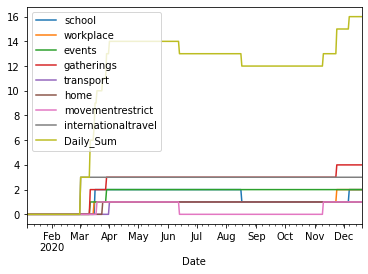

In [20]:
sweden_policy_transposed_FirstLastWeekDropped.plot(x="Date", y=[ 'school', 'workplace', 'events','gatherings','transport', 
                  'home','movementrestrict','internationaltravel', 'Daily_Sum'])
plt.show()

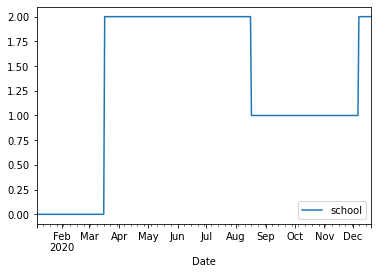

In [21]:
df1 = sweden_policy_transposed_FirstLastWeekDropped[["Date", "school"]]
df1.plot(x="Date", y="school")
plt.show()

Daily policy fluctuations sweden


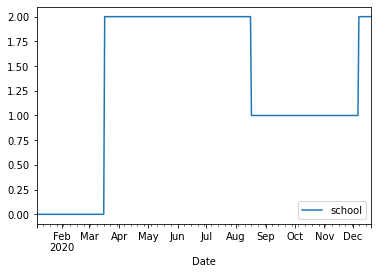

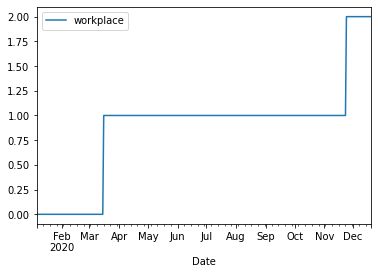

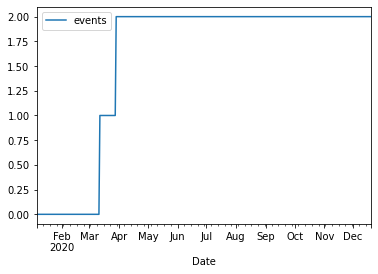

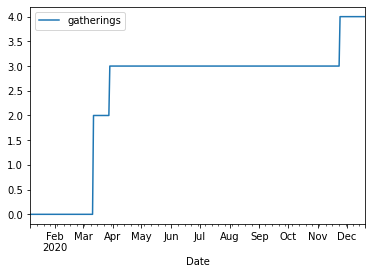

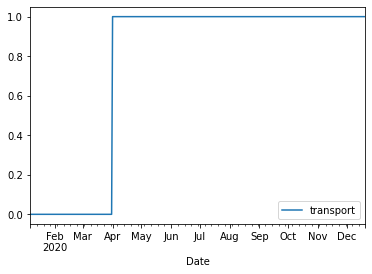

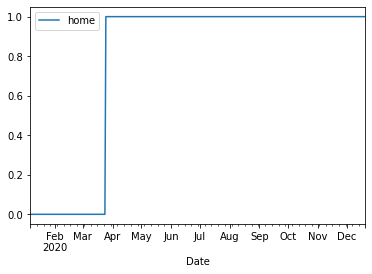

In [22]:
df1 = sweden_policy_transposed_FirstLastWeekDropped[["Date", "school"]]
df2 = sweden_policy_transposed_FirstLastWeekDropped[["Date", "workplace"]]
df3 = sweden_policy_transposed_FirstLastWeekDropped[["Date", "events"]]
df4 = sweden_policy_transposed_FirstLastWeekDropped[["Date", "gatherings"]]
df5 = sweden_policy_transposed_FirstLastWeekDropped[["Date", "transport"]]
df6 = sweden_policy_transposed_FirstLastWeekDropped[["Date", "home"]]
df7 = sweden_policy_transposed_FirstLastWeekDropped[["Date", "movementrestrict"]]
df8 = sweden_policy_transposed_FirstLastWeekDropped[["Date", "internationaltravel"]]


#define number of rows and columns for subplots
nrow=3
ncol=2

# make a list of all dataframes 
df_list = [df1 ,df2, df3, df4, df5, df6, df7, df8]
#fig, axes = plt.subplots(nrow, ncol)

# plot counter
count=0
for r in range(nrow):
    for c in range( ncol):
        yi=df_list[count].columns[1]
        df_list[count].plot(x="Date", y=yi)

        count+=1
print("Daily policy fluctuations sweden")       
plt.show()

In [23]:
#sweden_policy_transposed_FirstLastWeekDropped.hist(figsize=(20,15))
#plt.show()

In [24]:
#extract only the two columns of daily_sum and week_of year
policy_2020_total_sweden=sweden_policy_transposed_FirstLastWeekDropped.iloc[:,9:11]
print(policy_2020_total_sweden.iloc[47:70,:])

    Daily_Sum  week_of_year
54        0.0             8
55        0.0             8
56        0.0             9
57        0.0             9
58        0.0             9
59        0.0             9
60        0.0             9
61        0.0             9
62        0.0             9
63        3.0            10
64        3.0            10
65        3.0            10
66        3.0            10
67        3.0            10
68        3.0            10
69        3.0            10
70        3.0            11
71        3.0            11
72        3.0            11
73        6.0            11
74        6.0            11
75        6.0            11
76        6.0            11


In [25]:
# 7 days 50 weeks = 350 data points
policy_2020_total_sweden.shape

(350, 2)

## Group the daily sum by week

In [26]:
#group by week and sum up the daily_sums (within a week, i.e. within a group)
weekly_policy_2020_sweden=policy_2020_total_sweden.groupby(['week_of_year']).sum()
weekly_policy_2020_sweden.columns=["Weekly_sum"] 

In [27]:
weekly_policy_2020_sweden.head(10)

,Weekly_sum
week_of_year,
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0
10,21.0


In [28]:
print(weekly_policy_2020_sweden.iloc[:18, :])

              Weekly_sum
week_of_year            
2                    0.0
3                    0.0
4                    0.0
5                    0.0
6                    0.0
7                    0.0
8                    0.0
9                    0.0
10                  21.0
11                  33.0
12                  65.0
13                  77.0
14                  96.0
15                  98.0
16                  98.0
17                  98.0
18                  98.0
19                  98.0


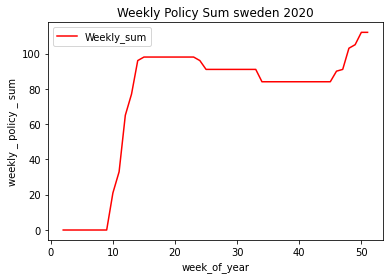

In [29]:
ax = plt.gca()
weekly_policy_2020_sweden.plot(kind='line',y='Weekly_sum', color='red', ax=ax)
plt.title('Weekly Policy Sum sweden 2020')
plt.ylabel('weekly _ policy _ sum')
plt.xlabel('week_of_year')

plt.show()

## Normalize weekly sums 

In [30]:
#average weekly independent variable 
weekly_ratio_policy_2020_sweden=weekly_policy_2020_sweden/7
weekly_ratio_policy_2020_sweden.head(10)

,Weekly_sum
week_of_year,
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.000000
9,0.000000
10,3.000000


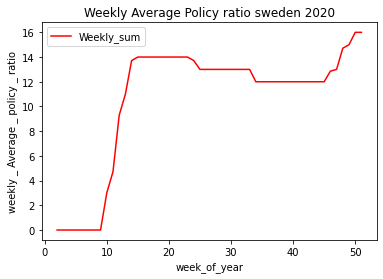

In [31]:
ax = plt.gca()
weekly_ratio_policy_2020_sweden.plot(kind='line',y='Weekly_sum', color='red', ax=ax)
plt.title('Weekly Average Policy ratio sweden 2020')
plt.ylabel('weekly _ Average _ policy _ ratio')
plt.xlabel('week_of_year')

plt.show()

In [32]:
#the final independent variable in list form 
weekly_ratio_policy_2020_sweden=weekly_ratio_policy_2020_sweden['Weekly_sum'].tolist()
print(weekly_ratio_policy_2020_sweden[:14])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 4.714285714285714, 9.285714285714286, 11.0, 13.714285714285714, 14.0]


## 1.6 Sub- indicators
### Let's break down the total policy sum into sub policy indicators: define  sub features of IV

In [33]:
#extract only the two columns of daily_sum and week_of year
policy_2020_indicators_sweden=sweden_policy_transposed_FirstLastWeekDropped.iloc[:, 1:11]
print(policy_2020_indicators_sweden.iloc[70:90,:])

    school  workplace  events  gatherings  transport  home  movementrestrict  \
77     0.0        1.0     1.0         2.0        0.0   0.0               0.0   
78     2.0        1.0     1.0         2.0        0.0   0.0               0.0   
79     2.0        1.0     1.0         2.0        0.0   0.0               0.0   
80     2.0        1.0     1.0         2.0        0.0   0.0               1.0   
81     2.0        1.0     1.0         2.0        0.0   0.0               1.0   
82     2.0        1.0     1.0         2.0        0.0   0.0               1.0   
83     2.0        1.0     1.0         2.0        0.0   0.0               1.0   
84     2.0        1.0     1.0         2.0        0.0   0.0               1.0   
85     2.0        1.0     1.0         2.0        0.0   0.0               1.0   
86     2.0        1.0     1.0         2.0        0.0   1.0               1.0   
87     2.0        1.0     1.0         2.0        0.0   1.0               1.0   
88     2.0        1.0     1.0         2.

### We keep all the sub indicators  for sweden

In [34]:
#extract only the two columns of daily_sum and week_of year

#policy_2020_indicators_sweden.drop('transport', inplace=True, axis=1)
print(policy_2020_indicators_sweden.iloc[70:90,:])


    school  workplace  events  gatherings  transport  home  movementrestrict  \
77     0.0        1.0     1.0         2.0        0.0   0.0               0.0   
78     2.0        1.0     1.0         2.0        0.0   0.0               0.0   
79     2.0        1.0     1.0         2.0        0.0   0.0               0.0   
80     2.0        1.0     1.0         2.0        0.0   0.0               1.0   
81     2.0        1.0     1.0         2.0        0.0   0.0               1.0   
82     2.0        1.0     1.0         2.0        0.0   0.0               1.0   
83     2.0        1.0     1.0         2.0        0.0   0.0               1.0   
84     2.0        1.0     1.0         2.0        0.0   0.0               1.0   
85     2.0        1.0     1.0         2.0        0.0   0.0               1.0   
86     2.0        1.0     1.0         2.0        0.0   1.0               1.0   
87     2.0        1.0     1.0         2.0        0.0   1.0               1.0   
88     2.0        1.0     1.0         2.

In [35]:
#group by week and sum up the daily_sums (within a week, i.e. within a group)
weekly_policy_2020_sweden_indicators=policy_2020_indicators_sweden.groupby(['week_of_year']).sum()
weekly_policy_2020_sweden_indicators.columns=["weekly_school", "weekly_workplace", "weekly_events","weekly_gatherings"
                                             ,"weekly_transportation","weekly_home", "weekly_movement", "weekly_travel", "weekly_sum"] 
print(weekly_policy_2020_sweden_indicators.iloc[45:50, :])


              weekly_school  weekly_workplace  weekly_events  \
week_of_year                                                   
47                      7.0               7.0           14.0   
48                      7.0              13.0           14.0   
49                      7.0              14.0           14.0   
50                     14.0              14.0           14.0   
51                     14.0              14.0           14.0   

              weekly_gatherings  weekly_transportation  weekly_home  \
week_of_year                                                          
47                         21.0                    7.0          7.0   
48                         27.0                    7.0          7.0   
49                         28.0                    7.0          7.0   
50                         28.0                    7.0          7.0   
51                         28.0                    7.0          7.0   

              weekly_movement  weekly_travel  weekly_

### Now we have weekly average of every single indicator (except transporation which was dropped)

In [36]:
#average weekly independent variable 
weekly_policy_2020_sweden_indicators_ratio=weekly_policy_2020_sweden_indicators/7
weekly_policy_2020_sweden_indicators_ratio.head(10)

,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_transportation,weekly_home,weekly_movement,weekly_travel,weekly_sum
week_of_year,,,,,,,,,
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
5,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
6,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
7,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
8,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
9,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
10,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,3.0,3.000000


# Part two

## 2.1  Reading in the editorship data


In [37]:

#Reading in the editorship data of the 5 countries


from datetime import datetime
import datetime
import sys
sys.path.insert(1, "../src")



revs_deutch = pd.read_csv("/Users/luna/Desktop/Wikipedia_Rhythms/data/revisions_countrywide/dewiki.csv")
revs_hungary = pd.read_csv("/Users/luna/Desktop/Wikipedia_Rhythms/data/revisions_countrywide/huwiki.csv")
revs_italy = pd.read_csv("/Users/luna/Desktop/Wikipedia_Rhythms/data/revisions_countrywide/itwiki.csv")
revs_poland = pd.read_csv("/Users/luna/Desktop/Wikipedia_Rhythms/data/revisions_countrywide/plwiki.csv")
revs_sweden = pd.read_csv("/Users/luna/Desktop/Wikipedia_Rhythms/data/revisions_countrywide/sewiki.csv")

print(revs_deutch.shape)
print(revs_hungary.shape)
print(revs_italy.shape)
print(revs_poland.shape)
print(revs_sweden.shape)

(29638, 5)
(29632, 5)
(29627, 5)
(29639, 5)
(3646, 5)


In [38]:
#test #get week number
datetime.date(2010, 6, 16).weekday()


2

In [39]:
#test #get hour number
datetime.datetime(2017, 11, 28, 23, 55, 59, 342380).hour


23

In [40]:
revs_sweden.head()

,y,m,d,h,c
0,2018,1,2,11,1
1,2018,1,2,14,1
2,2018,1,2,19,1
3,2018,1,3,15,1
4,2018,1,3,16,1


In [41]:

#making up the datetime structure 
revs_sweden['dateInt']=revs_sweden['y'].astype(str) + revs_sweden['m'].astype(str).str.zfill(2)+ revs_sweden['d'].astype(str).str.zfill(2)
revs_sweden['Date'] = pd.to_datetime(revs_sweden['dateInt'], format='%Y%m%d')      
revs_sweden = revs_sweden.reset_index()
revs_sweden.head()

,index,y,m,d,h,c,dateInt,Date
0,0,2018,1,2,11,1,20180102,2018-01-02
1,1,2018,1,2,14,1,20180102,2018-01-02
2,2,2018,1,2,19,1,20180102,2018-01-02
3,3,2018,1,3,15,1,20180103,2018-01-03
4,4,2018,1,3,16,1,20180103,2018-01-03


In [42]:
print(revs_sweden.iloc[50:55, :])

    index     y  m   d   h  c   dateInt       Date
50     50  2018  1  21  20  1  20180121 2018-01-21
51     51  2018  1  21  21  1  20180121 2018-01-21
52     52  2018  1  21  22  5  20180121 2018-01-21
53     53  2018  1  21  23  1  20180121 2018-01-21
54     54  2018  1  22  10  1  20180122 2018-01-22


In [43]:

#extract the week number and add it as a new column
revs_sweden['week_of_year']= revs_sweden['Date'].apply(lambda x: x.isocalendar()[1])

#extract the hour of the week
#revs_sweden['hour_of_week']=revs_sweden['Date'].apply(lambda x: x.hour+ (24*x.weekday())  )
revs_sweden['hour_of_week']=revs_sweden['Date'].apply(lambda x: 24*x.weekday()) + revs_sweden['h']


#https://stackoverflow.com/questions/9847213/how-do-i-get-the-day-of-week-given-a-date
revs_sweden.head(10)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
0,0,2018,1,2,11,1,20180102,2018-01-02,1,35
1,1,2018,1,2,14,1,20180102,2018-01-02,1,38
2,2,2018,1,2,19,1,20180102,2018-01-02,1,43
3,3,2018,1,3,15,1,20180103,2018-01-03,1,63
4,4,2018,1,3,16,1,20180103,2018-01-03,1,64
5,5,2018,1,5,16,1,20180105,2018-01-05,1,112
6,6,2018,1,6,20,1,20180106,2018-01-06,1,140
7,7,2018,1,8,0,1,20180108,2018-01-08,2,0
8,8,2018,1,8,13,1,20180108,2018-01-08,2,13
9,9,2018,1,8,20,1,20180108,2018-01-08,2,20


### 2.2 Prepare editorship data sweden for 2020

In [44]:
#We get all data which is from 2020 and  where  1< week_of_year <52 
revs_sweden_2020=revs_sweden.loc[(revs_sweden['Date'] >= '2020-01-01 00:00:00') & (revs_sweden['Date'] < '2021-01-01 00:00:00')& (revs_sweden['week_of_year'] < 52)& (1<revs_sweden['week_of_year'])]
revs_sweden_2020.head(10)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
2051,2051,2020,1,6,8,3,20200106,2020-01-06,2,8
2052,2052,2020,1,6,9,1,20200106,2020-01-06,2,9
2053,2053,2020,1,6,14,1,20200106,2020-01-06,2,14
2054,2054,2020,1,6,15,1,20200106,2020-01-06,2,15
2055,2055,2020,1,6,16,4,20200106,2020-01-06,2,16
2056,2056,2020,1,6,17,8,20200106,2020-01-06,2,17
2057,2057,2020,1,6,18,4,20200106,2020-01-06,2,18
2058,2058,2020,1,6,23,2,20200106,2020-01-06,2,23
2059,2059,2020,1,7,17,2,20200107,2020-01-07,2,41
2060,2060,2020,1,8,7,1,20200108,2020-01-08,2,55


In [45]:
#tail
revs_sweden_2020.tail(5)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
3364,3364,2020,12,15,0,1,20201215,2020-12-15,51,24
3365,3365,2020,12,15,7,1,20201215,2020-12-15,51,31
3366,3366,2020,12,17,17,2,20201217,2020-12-17,51,89
3367,3367,2020,12,17,22,1,20201217,2020-12-17,51,94
3368,3368,2020,12,19,21,1,20201219,2020-12-19,51,141


In [46]:

#group by 'week_of_year', 'hour_of_week' 

grouped_sweden_2020=revs_sweden_2020.groupby(['week_of_year', 'hour_of_week']).sum()

grouped_sweden_2020 = grouped_sweden_2020.reset_index()
grouped_sweden_2020.head(10)

,week_of_year,hour_of_week,index,y,m,d,h,c
0,2,8,2051,2020,1,6,8,3
1,2,9,2052,2020,1,6,9,1
2,2,14,2053,2020,1,6,14,1
3,2,15,2054,2020,1,6,15,1
4,2,16,2055,2020,1,6,16,4
5,2,17,2056,2020,1,6,17,8
6,2,18,2057,2020,1,6,18,4
7,2,23,2058,2020,1,6,23,2
8,2,41,2059,2020,1,7,17,2
9,2,55,2060,2020,1,8,7,1


In [47]:
#tail
grouped_sweden_2020.tail(5)

,week_of_year,hour_of_week,index,y,m,d,h,c
1313,51,24,3364,2020,12,15,0,1
1314,51,31,3365,2020,12,15,7,1
1315,51,89,3366,2020,12,17,17,2
1316,51,94,3367,2020,12,17,22,1
1317,51,141,3368,2020,12,19,21,1


In [48]:

#populate the numpy array 

array_weekly_events_sweden_2020 = np.zeros((52,168))


for  i in range (grouped_sweden_2020.shape[0]):
    
    week=grouped_sweden_2020.iloc[i]['week_of_year']
    hour=grouped_sweden_2020.iloc[i]['hour_of_week']
    array_weekly_events_sweden_2020[week][hour]= grouped_sweden_2020.iloc[i]['c']



In [49]:
print(array_weekly_events_sweden_2020)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [50]:
print(array_weekly_events_sweden_2020[3][:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [51]:
#we need the weekly_sums to be able to devide the daily counts by this total weely sum
weekly_sum_sweden_2020=np.sum(array_weekly_events_sweden_2020 , axis=1)
print(weekly_sum_sweden_2020)

[  0.   0.  52.  22.  76.  96. 118. 115. 121. 143.  72.  71. 110.  48.
  88.  79.  38.  27.  66. 114.  41.  34.  43.  56. 164. 131. 256. 278.
  74. 185. 114. 180.  49.  20.  17.  24.  28.  13.  30.  19.  23.  54.
  61.  57. 119.  44.  18.  20.  43.  20.  11.   6.]


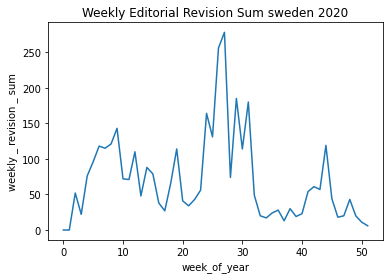

In [52]:
ax = plt.gca()

plt.plot(weekly_sum_sweden_2020) 
plt.title('Weekly Editorial Revision Sum sweden 2020')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()

In [53]:
#we need the yearly_sums to be able to normalize the daily counts by this total yearly sum
yearly_sum_2020_sweden=np.sum(weekly_sum_sweden_2020)
yearly_sum_2020_sweden

3688.0

### 2.3  168 daily ratios for 2020 sweden

In [54]:

array_weekly_ratios_sweden_2020=np.zeros((50,168))
    
for i in range (50):
    
    #becaue the first two rows of array_weekly_events_sweden_2020 
    #were all zeros( belonging to the 0th and 1st week) --> we move the indice by 2  -->so we skip the first two rows of the nummpy array
    
    array_weekly_ratios_sweden_2020[i]=array_weekly_events_sweden_2020[i+2]/weekly_sum_sweden_2020[i+2]

print(array_weekly_ratios_sweden_2020)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [55]:
print(array_weekly_ratios_sweden_2020[1][:])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.09090909 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.09090909 0.         0.
 0.         0.         0.         0.         0.         0.09090909
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.13636364
 0.         0.         0.         0.         0.09090909 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.04545455 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.04545455 0.09090909 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.    

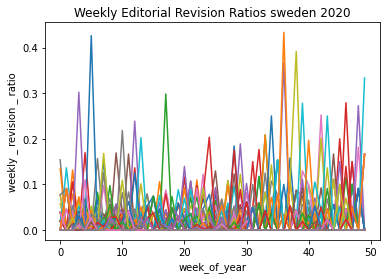

In [56]:
ax = plt.gca()

plt.plot(array_weekly_ratios_sweden_2020) 
plt.title('Weekly Editorial Revision Ratios sweden 2020')
plt.ylabel('weekly _ revision _ ratio')
plt.xlabel('week_of_year')
plt.show()

### 2.4 Prepare editorship data sweden for 2019

In [57]:
#We get all data which is from 2019 and  where  1<week_of_year<52 

revs_sweden_2019=revs_sweden.loc[(revs_sweden['Date'] >= '2019-01-01 00:00:00') & (revs_sweden['Date'] < '2020-01-01 00:00:00') & (revs_sweden['week_of_year'] < 52)& (1<revs_sweden['week_of_year'])]
revs_sweden_2019.head(10)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
829,829,2019,1,7,9,6,20190107,2019-01-07,2,9
830,830,2019,1,9,15,1,20190109,2019-01-09,2,63
831,831,2019,1,9,21,1,20190109,2019-01-09,2,69
832,832,2019,1,10,14,1,20190110,2019-01-10,2,86
833,833,2019,1,11,12,3,20190111,2019-01-11,2,108
834,834,2019,1,11,15,1,20190111,2019-01-11,2,111
835,835,2019,1,14,9,1,20190114,2019-01-14,3,9
836,836,2019,1,16,18,1,20190116,2019-01-16,3,66
837,837,2019,1,17,9,1,20190117,2019-01-17,3,81
838,838,2019,1,17,12,4,20190117,2019-01-17,3,84


In [58]:
revs_sweden_2019.tail(5)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
1975,1975,2019,12,22,14,4,20191222,2019-12-22,51,158
1976,1976,2019,12,22,19,5,20191222,2019-12-22,51,163
1977,1977,2019,12,22,20,1,20191222,2019-12-22,51,164
1978,1978,2019,12,22,22,4,20191222,2019-12-22,51,166
1979,1979,2019,12,22,23,3,20191222,2019-12-22,51,167


In [59]:

grouped_sweden_2019=revs_sweden_2019.groupby(['week_of_year', 'hour_of_week']).sum()
grouped_sweden_2019 = grouped_sweden_2019.reset_index()
grouped_sweden_2019.head(10)

,week_of_year,hour_of_week,index,y,m,d,h,c
0,2,9,829,2019,1,7,9,6
1,2,63,830,2019,1,9,15,1
2,2,69,831,2019,1,9,21,1
3,2,86,832,2019,1,10,14,1
4,2,108,833,2019,1,11,12,3
5,2,111,834,2019,1,11,15,1
6,3,9,835,2019,1,14,9,1
7,3,66,836,2019,1,16,18,1
8,3,81,837,2019,1,17,9,1
9,3,84,838,2019,1,17,12,4


In [60]:
grouped_sweden_2019.tail(5)

,week_of_year,hour_of_week,index,y,m,d,h,c
1146,51,158,1975,2019,12,22,14,4
1147,51,163,1976,2019,12,22,19,5
1148,51,164,1977,2019,12,22,20,1
1149,51,166,1978,2019,12,22,22,4
1150,51,167,1979,2019,12,22,23,3


In [61]:


array_weekly_events_sweden_2019 = np.zeros((52,168))



for  i in range (grouped_sweden_2019.shape[0]):
    
    week=grouped_sweden_2019.iloc[i]['week_of_year']
    hour=grouped_sweden_2019.iloc[i]['hour_of_week']
    array_weekly_events_sweden_2019[week][hour]= grouped_sweden_2019.iloc[i]['c']

print(array_weekly_events_sweden_2019)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 2. 1.]
 [0. 1. 0. ... 0. 0. 1.]
 [0. 1. 1. ... 0. 4. 3.]]


In [62]:
print(array_weekly_events_sweden_2020[3][:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [63]:
weekly_sum_sweden_2019=np.sum(array_weekly_events_sweden_2019 , axis=1)
print(weekly_sum_sweden_2019)

[  0.   0.  13.  22.  52.  40.  38. 114.  35.  33. 132. 172. 272.   7.
  65.  95.  89.  74. 174. 263. 109. 724. 209.  78. 113.  20.  37.   9.
  20.  12.  18.  18.  21.   7.  41.  63.  17.  22. 123.  30. 610. 318.
 276. 256. 280. 148.  47. 166. 149.  51.  69.  76.]


In [64]:
#we need the yearly_sums to be able to normalize the daily counts by this total yearly sum
yearly_sum_2019_sweden=np.sum(weekly_sum_sweden_2019)
yearly_sum_2019_sweden

5827.0

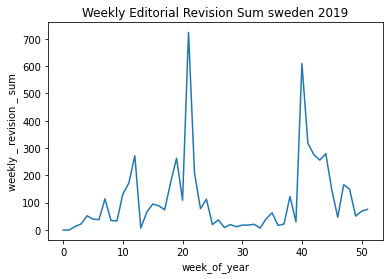

In [65]:
ax = plt.gca()

plt.plot(weekly_sum_sweden_2019) 
plt.title('Weekly Editorial Revision Sum sweden 2019')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()

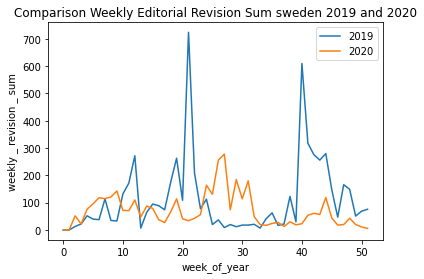

In [66]:

plt.plot(weekly_sum_sweden_2019, label= '2019') 
plt.plot(weekly_sum_sweden_2020, label= '2020') 

plt.title('Comparison Weekly Editorial Revision Sum sweden 2019 and 2020')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.legend()

plt.show()

# Part three: Experiments 



## 3.1 EXPERIMENT 1:  Weekly normalizated data

### Normalize by weekly sums

In [67]:

array_weekly_ratios_sweden_2019=np.zeros((50,168))
    
for i in range (50):
    
    
    array_weekly_ratios_sweden_2019[i]=array_weekly_events_sweden_2019[i+2]/weekly_sum_sweden_2019[i+2]

print(array_weekly_ratios_sweden_2019)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.11538462 0.19230769 0.05769231 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.03921569 0.01960784]
 [0.         0.01449275 0.         ... 0.         0.         0.01449275]
 [0.         0.01315789 0.01315789 ... 0.         0.05263158 0.03947368]]


In [68]:
print(array_weekly_ratios_sweden_2019[1][:])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.04545455 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.04545455 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.04545455 0.         0.
 0.18181818 0.         0.         0.         0.         0.04545455
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

No handles with labels found to put in legend.


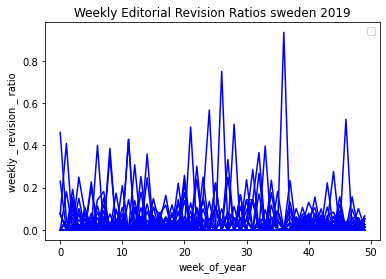

In [69]:
ax = plt.gca()
plt.plot(array_weekly_ratios_sweden_2019, color='blue') 



plt.title('Weekly Editorial Revision Ratios sweden 2019')
plt.ylabel('weekly _ revision _ ratio')
plt.xlabel('week_of_year')
plt.legend()

#plt.grid()
plt.show()

No handles with labels found to put in legend.


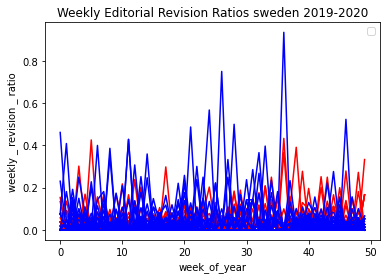

In [70]:
ax = plt.gca()
plt.plot(array_weekly_ratios_sweden_2020, color='red') 

plt.plot(array_weekly_ratios_sweden_2019, color='blue')




plt.title('Weekly Editorial Revision Ratios sweden 2019-2020')
plt.ylabel('weekly _ revision _ ratio')
plt.xlabel('week_of_year')
plt.legend()

#plt.grid()
plt.show()

### Let's instantiate a dictionary to keep the correlations after evey step

In [71]:
earth_correlations={ }
jensen_correlations={ }

### earthmover and jensenshanon plots

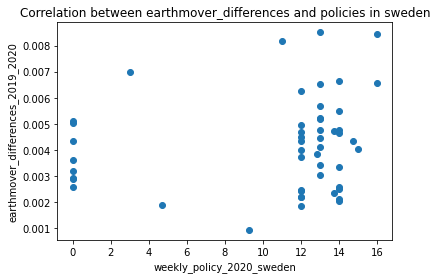

correlation and p_value are:  0.1567406310013737 0.2770249457051258


In [72]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_sweden_2019[i] and array_weekly_ratios_sweden_2020[i]  
#and append this difference to a list

#dependent variable

ex1_earthmover_differences= []
for i in range(len(array_weekly_ratios_sweden_2019)) :
    ex1_earthmover_differences.append(wasserstein_distance(array_weekly_ratios_sweden_2019[i], array_weekly_ratios_sweden_2020[i]))




plt.scatter(weekly_ratio_policy_2020_sweden, ex1_earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in sweden')
plt.xlabel('weekly_policy_2020_sweden')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()


corr, p_value=stats.pearsonr(ex1_earthmover_differences, weekly_ratio_policy_2020_sweden)
print("correlation and p_value are: ", corr, p_value)

#save to dictionary

earth_correlations['ex1 : normalizedweekly_earth']=corr


In [73]:
print(earth_correlations)

{'ex1 : normalizedweekly_earth': 0.1567406310013737}


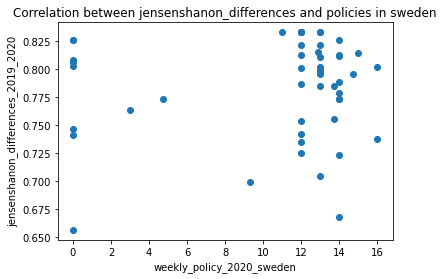

correlation and p_value are:  0.10161001377269012 0.482592429220452


In [74]:

#jensen shanon divergence

ex1_jensenshanon_differences= []
  

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_sweden_2019)) :
    ex1_jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_sweden_2019[i], array_weekly_ratios_sweden_2020[i]))
    

plt.scatter(weekly_ratio_policy_2020_sweden, ex1_jensenshanon_differences) 
plt.title('Correlation between jensenshanon_differences and policies in sweden')
plt.xlabel('weekly_policy_2020_sweden')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()


corr, p_value=stats.pearsonr(ex1_jensenshanon_differences, weekly_ratio_policy_2020_sweden)
print("correlation and p_value are: ", corr, p_value)

# save to dict

jensen_correlations['ex1 : normalizedweekly_jensen']=corr


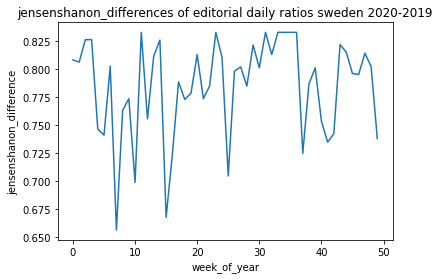

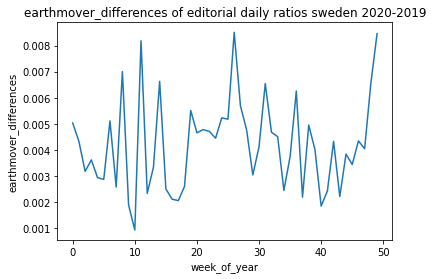

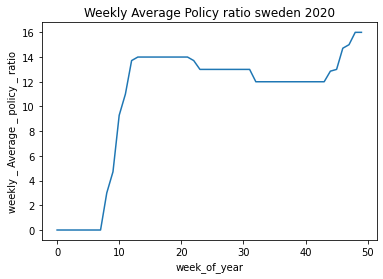

In [75]:

plt.plot(ex1_jensenshanon_differences) 
plt.title('jensenshanon_differences of editorial daily ratios sweden 2020-2019')
plt.ylabel('jensenshanon_difference')
plt.xlabel('week_of_year')
plt.show()


plt.plot(ex1_earthmover_differences) 
plt.title('earthmover_differences of editorial daily ratios sweden 2020-2019')
plt.ylabel('earthmover_differences')
plt.xlabel('week_of_year')
plt.show()


plt.plot(weekly_ratio_policy_2020_sweden)
plt.title('Weekly Average Policy ratio sweden 2020')
plt.ylabel('weekly _ Average _ policy _ ratio')
plt.xlabel('week_of_year')

plt.show()

## 00. Experiment 0: yearly normalized data

In [76]:
array_weekly_ratios_sweden_2019_weeklyyearlynorm=np.zeros((50,168))
for i in range (50):
    
    
    array_weekly_ratios_sweden_2019_weeklyyearlynorm[i]=array_weekly_events_sweden_2019[i]/yearly_sum_2019_sweden

    #array_weekly_ratios_sweden_2019_weeklyyearlynorm[i]=array_weekly_ratios_sweden_2019[i]/yearly_sum_2019_sweden

    
array_weekly_ratios_sweden_2020_weeklyyearlynorm=np.zeros((50,168))
for i in range (50):
    
    
    array_weekly_ratios_sweden_2020_weeklyyearlynorm[i]=array_weekly_events_sweden_2020[i]/yearly_sum_2020_sweden
    #array_weekly_ratios_sweden_2020_weeklyyearlynorm[i]=array_weekly_ratios_sweden_2020[i]/yearly_sum_2020_sweden


print(array_weekly_ratios_sweden_2020_weeklyyearlynorm)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.00135575 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


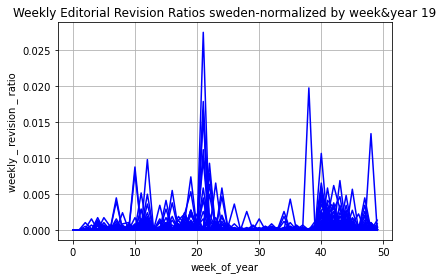

In [77]:
ax = plt.gca()

plt.plot(array_weekly_ratios_sweden_2019_weeklyyearlynorm, color='blue') 
plt.title('Weekly Editorial Revision Ratios sweden-normalized by week&year 19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()

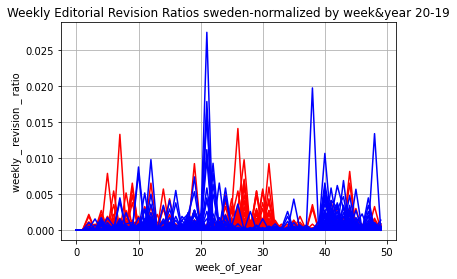

In [78]:
ax = plt.gca()

plt.plot(array_weekly_ratios_sweden_2020_weeklyyearlynorm, color='red') 
plt.plot(array_weekly_ratios_sweden_2019_weeklyyearlynorm, color='blue') 
plt.title('Weekly Editorial Revision Ratios sweden-normalized by week&year 20-19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()

/Users/luna/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:1288: RuntimeWarning: invalid value encountered in true_divide
  p = p / np.sum(p, axis=0)
/Users/luna/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:1289: RuntimeWarning: invalid value encountered in true_divide
  q = q / np.sum(q, axis=0)


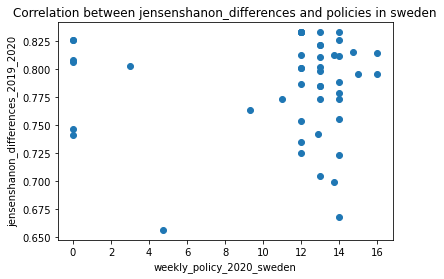

In [79]:
#jensen shanon divergence

ex0_jensenshanon_differences= []
  

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_sweden_2019)) :
    ex0_jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_sweden_2019_weeklyyearlynorm[i], array_weekly_ratios_sweden_2020_weeklyyearlynorm[i]))
    

plt.scatter(weekly_ratio_policy_2020_sweden, ex0_jensenshanon_differences) 
plt.title('Correlation between jensenshanon_differences and policies in sweden')
plt.xlabel('weekly_policy_2020_sweden')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()


if "nan" or "inf" in ex0_jensenshanon_differences:
    corr, p_value = "nan", "nan"
    jensen_correlations['PC1_basic_jensen']="nan"

else:

    corr, p_value=stats.pearsonr(ex0_jensenshanon_differences, weekly_ratio_policy_2020_sweden)

    print("correlation and p_value are: ", corr, p_value)
    jensen_correlations['ex0 : normalizedyearly_jensen']=corr

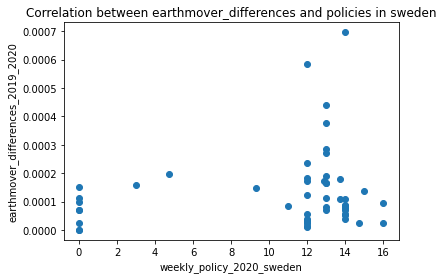

correlation and p_value are:  0.1748939596655673 0.2244435188949481


In [80]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_sweden_2019[i] and array_weekly_ratios_sweden_2020[i]  
#and append this difference to a list

#dependent variable

ex0_earthmover_differences= []
for i in range(len(array_weekly_ratios_sweden_2019)) :
    ex0_earthmover_differences.append(wasserstein_distance(array_weekly_ratios_sweden_2019_weeklyyearlynorm[i], array_weekly_ratios_sweden_2020_weeklyyearlynorm[i]))



plt.scatter(weekly_ratio_policy_2020_sweden, ex0_earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in sweden')
plt.xlabel('weekly_policy_2020_sweden')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()



corr, p_value=stats.pearsonr(ex0_earthmover_differences, weekly_ratio_policy_2020_sweden)
print("correlation and p_value are: ", corr, p_value)

earth_correlations['ex0 : normalizedyearly_earth']=corr

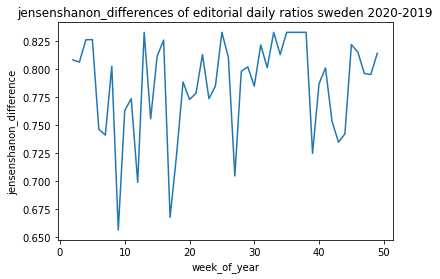

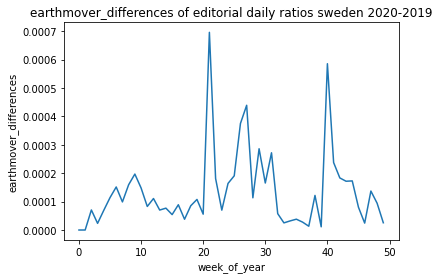

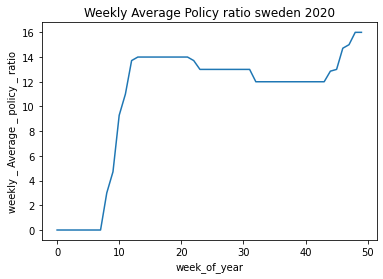

In [81]:
plt.plot(ex0_jensenshanon_differences) 
plt.title('jensenshanon_differences of editorial daily ratios sweden 2020-2019')
plt.ylabel('jensenshanon_difference')
plt.xlabel('week_of_year')
plt.show()


plt.plot(ex0_earthmover_differences) 
plt.title('earthmover_differences of editorial daily ratios sweden 2020-2019')
plt.ylabel('earthmover_differences')
plt.xlabel('week_of_year')
plt.show()


plt.plot(weekly_ratio_policy_2020_sweden)
plt.title('Weekly Average Policy ratio sweden 2020')
plt.ylabel('weekly _ Average _ policy _ ratio')
plt.xlabel('week_of_year')

plt.show()

## 3.2  EXPERIMENT 2: Weekly and yearly normalized data
### Normalize 2020 and 2019 ratios by yearly sum as well (yearly and weekly nomalization)


In [82]:

array_weekly_ratios_sweden_2019_weeklyyearlynorm=np.zeros((50,168))
for i in range (50):
    
    
    #array_weekly_ratios_sweden_2019_weeklyyearlynorm[i]=array_weekly_events_sweden_2019[i]/yearly_sum_2019_sweden

    array_weekly_ratios_sweden_2019_weeklyyearlynorm[i]=array_weekly_ratios_sweden_2019[i]/yearly_sum_2019_sweden

    
array_weekly_ratios_sweden_2020_weeklyyearlynorm=np.zeros((50,168))
for i in range (50):
    
    
    #array_weekly_ratios_sweden_2020_weeklyyearlynorm[i]=array_weekly_events_sweden_2020[i]/yearly_sum_2020_sweden
    array_weekly_ratios_sweden_2020_weeklyyearlynorm[i]=array_weekly_ratios_sweden_2020[i]/yearly_sum_2020_sweden


print(array_weekly_ratios_sweden_2020_weeklyyearlynorm)



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


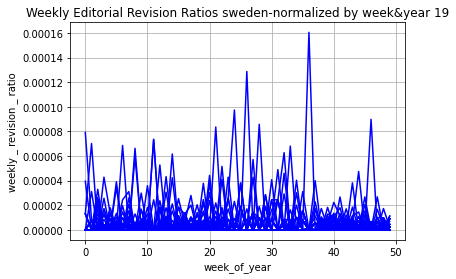

In [83]:
ax = plt.gca()

plt.plot(array_weekly_ratios_sweden_2019_weeklyyearlynorm, color='blue') 
plt.title('Weekly Editorial Revision Ratios sweden-normalized by week&year 19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()

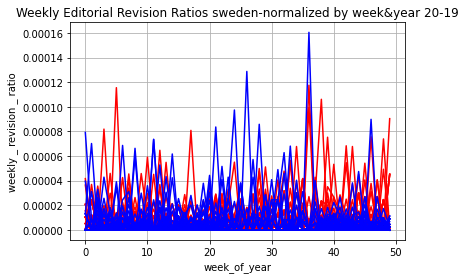

In [84]:
ax = plt.gca()

plt.plot(array_weekly_ratios_sweden_2020_weeklyyearlynorm, color='red') 
plt.plot(array_weekly_ratios_sweden_2019_weeklyyearlynorm, color='blue') 
plt.title('Weekly Editorial Revision Ratios sweden-normalized by week&year 20-19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()

## Plot x and y after yearly normalization

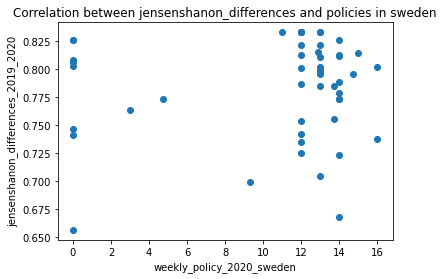

correlation and p_value are:  0.10161001377269019 0.4825924292204499


In [85]:

#jensen shanon divergence

ex2_jensenshanon_differences= []
  

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_sweden_2019)) :
    ex2_jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_sweden_2019_weeklyyearlynorm[i], array_weekly_ratios_sweden_2020_weeklyyearlynorm[i]))
    

plt.scatter(weekly_ratio_policy_2020_sweden, ex2_jensenshanon_differences) 
plt.title('Correlation between jensenshanon_differences and policies in sweden')
plt.xlabel('weekly_policy_2020_sweden')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(ex2_jensenshanon_differences, weekly_ratio_policy_2020_sweden)
print("correlation and p_value are: ", corr, p_value)
jensen_correlations['ex2 : normalizedyearlyweekly_jensen']=corr


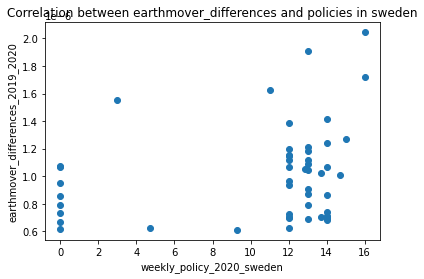

correlation and p_value are:  0.24154111021649383 0.09105129572749725


In [86]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_sweden_2019[i] and array_weekly_ratios_sweden_2020[i]  
#and append this difference to a list

#dependent variable

ex2_earthmover_differences= []
for i in range(len(array_weekly_ratios_sweden_2019)) :
    ex2_earthmover_differences.append(wasserstein_distance(array_weekly_ratios_sweden_2019_weeklyyearlynorm[i], array_weekly_ratios_sweden_2020_weeklyyearlynorm[i]))



plt.scatter(weekly_ratio_policy_2020_sweden, ex2_earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in sweden')
plt.xlabel('weekly_policy_2020_sweden')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()



corr, p_value=stats.pearsonr(ex2_earthmover_differences, weekly_ratio_policy_2020_sweden)
print("correlation and p_value are: ", corr, p_value)

earth_correlations['ex2 : normalizedyearlyweekly_earth']=corr


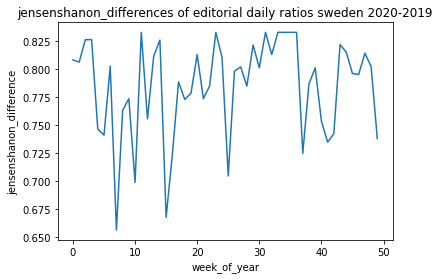

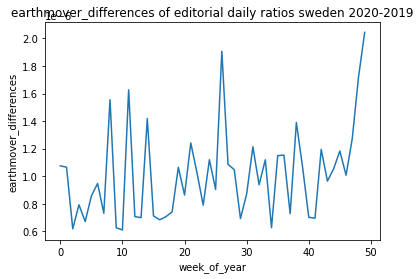

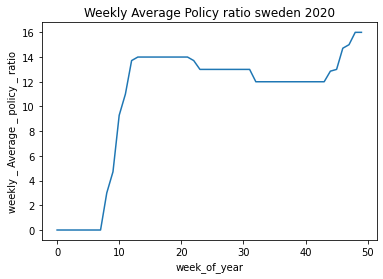

In [87]:




plt.plot(ex2_jensenshanon_differences) 
plt.title('jensenshanon_differences of editorial daily ratios sweden 2020-2019')
plt.ylabel('jensenshanon_difference')
plt.xlabel('week_of_year')
plt.show()


plt.plot(ex2_earthmover_differences) 
plt.title('earthmover_differences of editorial daily ratios sweden 2020-2019')
plt.ylabel('earthmover_differences')
plt.xlabel('week_of_year')
plt.show()


plt.plot(weekly_ratio_policy_2020_sweden)
plt.title('Weekly Average Policy ratio sweden 2020')
plt.ylabel('weekly _ Average _ policy _ ratio')
plt.xlabel('week_of_year')

plt.show()


## 3.3 Outlier detection
### let's first look at the 168 values from the week 20th

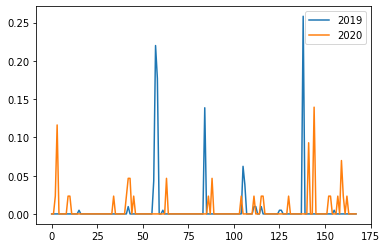

In [88]:
plt.plot(array_weekly_ratios_sweden_2019[20], label='2019' )

plt.plot(array_weekly_ratios_sweden_2020[20], label='2020' )

plt.legend()

plt.show()

In [89]:
print(ex2_earthmover_differences[20])

8.639219347447403e-07


## let's look at the 168 values from the week 11th

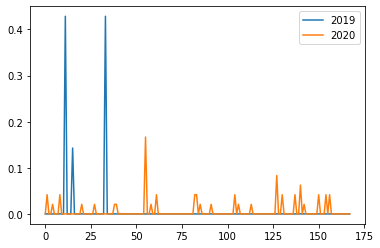

In [90]:
# Week 11 th 
plt.plot(array_weekly_ratios_sweden_2019[11],label='2019' )

plt.plot(array_weekly_ratios_sweden_2020[11], label='2020' )

plt.legend()

plt.show()

In [91]:
print(array_weekly_ratios_sweden_2019[11])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.42857143
 0.         0.         0.         0.14285714 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.42857143 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

## 3.3.1 EXPERIMENT 3: Outlier detection & removal  for 2019 [ for weekly normalized data ]

Let's try first to remove one example: the largest 2019 jump which takes place a bit after the 10th week

In [92]:

# LET'S find the maximum value of the 11th array
test_outlier=np.max(array_weekly_ratios_sweden_2019[11])
print("test_outlier is:  ", np.max(array_weekly_ratios_sweden_2019[11]))

test_outlier is:   0.42857142857142855


In [93]:
# get index position of the above maximum value 

np.where(array_weekly_ratios_sweden_2019[11] == test_outlier)

(array([11, 33]),)

In [94]:
#get the exact index
print(np.where(array_weekly_ratios_sweden_2019[11] == test_outlier)[0][0])

11


In [95]:
# let s see elements before and after the the outlier because we wanto susbsutitue the outlier by average of its before and after)
print(array_weekly_ratios_sweden_2019[11][90:94])

[0. 0. 0. 0.]


In [96]:

# see  the average of before and after the max element 
array_weekly_ratios_sweden_2019[11][92]=(array_weekly_ratios_sweden_2019[11][90]+array_weekly_ratios_sweden_2019[11][91])/2


print(array_weekly_ratios_sweden_2019[11][90:94])

[0. 0. 0. 0.]


## A

## Before outlier removal as we also looked at it above 

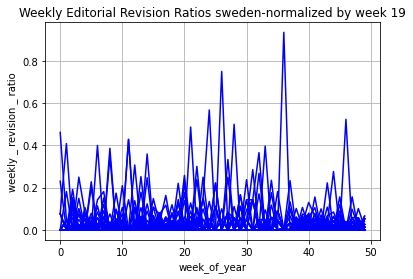

In [97]:
ax = plt.gca()

plt.plot(array_weekly_ratios_sweden_2019, color='blue') 
plt.title('Weekly Editorial Revision Ratios sweden-normalized by week 19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()

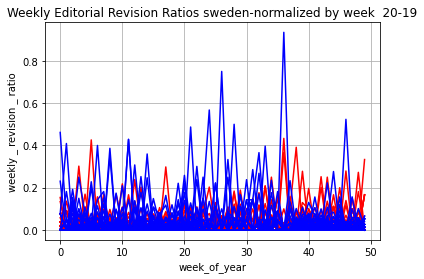

In [98]:
ax = plt.gca()

plt.plot(array_weekly_ratios_sweden_2020, color='red') 
plt.plot(array_weekly_ratios_sweden_2019, color='blue') 
plt.title('Weekly Editorial Revision Ratios sweden-normalized by week  20-19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()

In [99]:
array_weekly_ratios_sweden_2019.shape

(50, 168)

### remove outliers 10 times from every array in 50 weekly arrays for 2019 

In [100]:
#without_outlier_array_weekly_ratios_sweden_2019=np.zeros((50,168))

for j in range (10): #remove outlier n times  and plot after every time removed  - repeat outlier removal n times
    
    for i in range (50):
    
    
        maxvalue=np.max(array_weekly_ratios_sweden_2019[i])
        getindex=np.where(array_weekly_ratios_sweden_2019[i]== maxvalue)[0][0]
        if getindex+1 <168:
            array_weekly_ratios_sweden_2019[i][getindex]=(array_weekly_ratios_sweden_2019[i][getindex-1]+array_weekly_ratios_sweden_2019[i][getindex+1])/2
      

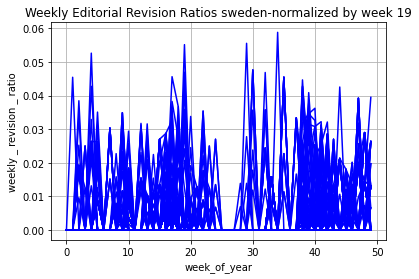

In [101]:
ax = plt.gca()
plt.plot(array_weekly_ratios_sweden_2019, color='blue') 
plt.title('Weekly Editorial Revision Ratios sweden-normalized by week 19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()  

#  After outliers removed

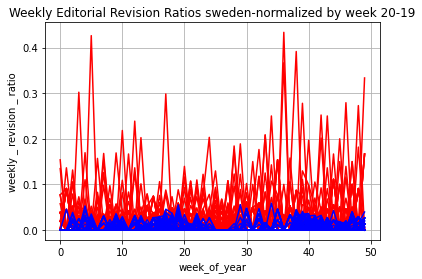

In [102]:
ax = plt.gca()
plt.plot(array_weekly_ratios_sweden_2020, color='red') 
plt.plot(array_weekly_ratios_sweden_2019, color='blue') 
plt.title('Weekly Editorial Revision Ratios sweden-normalized by week 20-19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()  

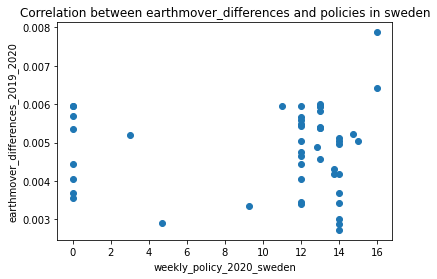

correlation and p_value are:  0.09090171779943777 0.53012411973517


In [103]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_sweden_2019[i] and array_weekly_ratios_sweden_2020[i]  
#and append this difference to a list

#dependent variable

ex3_earthmover_differences= []
for i in range(len(array_weekly_ratios_sweden_2019)) :
    ex3_earthmover_differences.append(wasserstein_distance(array_weekly_ratios_sweden_2019[i], array_weekly_ratios_sweden_2020[i]))




plt.scatter(weekly_ratio_policy_2020_sweden, ex3_earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in sweden')
plt.xlabel('weekly_policy_2020_sweden')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(ex3_earthmover_differences, weekly_ratio_policy_2020_sweden)
print("correlation and p_value are: ", corr, p_value)


earth_correlations['ex3 : without_outlier10_earth']=corr



/Users/luna/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:1288: RuntimeWarning: invalid value encountered in true_divide
  p = p / np.sum(p, axis=0)


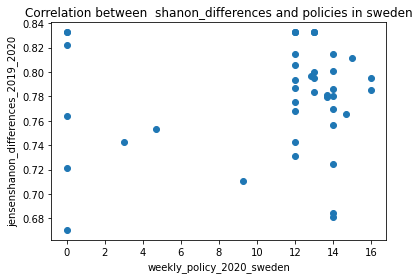

In [104]:

#jensen shanon divergence

ex3_jensenshanon_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_sweden_2019)) :
    ex3_jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_sweden_2019[i], array_weekly_ratios_sweden_2020[i]))
    
plt.scatter(weekly_ratio_policy_2020_sweden, ex3_jensenshanon_differences) 

plt.title('Correlation between  shanon_differences and policies in sweden')
plt.xlabel('weekly_policy_2020_sweden')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()


if "nan" or "inf" in ex3_jensenshanon_differences:
    corr, p_value = "nan", "nan"
    jensen_correlations['without_outlier10_jensen']="nan"

else:

    corr, p_value=stats.pearsonr(ex3_jensenshanon_differences, weekly_ratio_policy_2020_sweden)

    print("correlation and p_value are: ", corr, p_value)
    jensen_correlations['ex3 : without_outlier10_jensen']=corr



In [105]:
print(ex3_jensenshanon_differences)

[nan, 0.8325546111576978, 0.8220989207399798, 0.8325546111576977, 0.7638105776767109, 0.7216733847477806, nan, 0.6705004049038281, 0.742743237009049, 0.7536527812351449, 0.7109475151919771, nan, 0.781383348234939, 0.800626879026828, 0.8150601631104195, 0.6810635193676339, 0.7249828452483451, 0.7863163600222245, 0.769332114621661, 0.756522291558021, 0.7802838449142755, 0.6841806118280248, 0.779689505082209, 0.8325546111576978, 0.7948207072910103, nan, nan, nan, 0.8325546111576977, 0.8325546111576977, 0.8001695204032768, nan, 0.7870267095892491, 0.8325546111576977, 0.8325546111576978, 0.8325546111576978, nan, 0.8058488628731164, 0.7751095600200352, 0.7932277753699538, 0.7314471676100959, 0.7430543301941626, 0.7681189187981792, 0.8145500200590905, 0.7971243422904871, 0.7834171165779227, 0.7654645533747323, 0.8116499194862477, 0.7853071318959477, 0.7951739440524885]


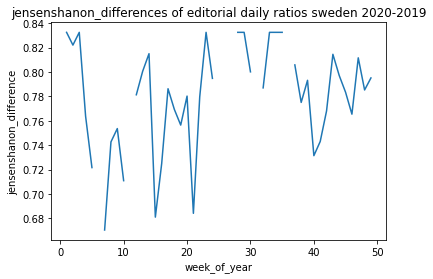

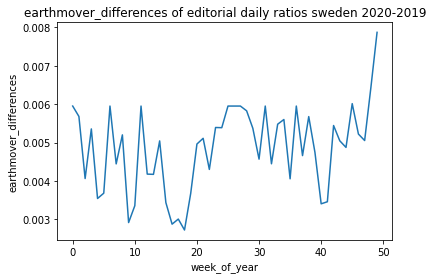

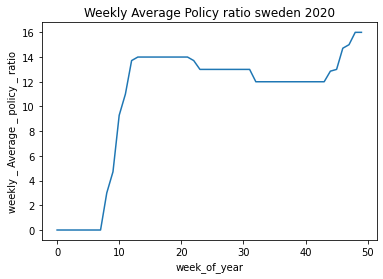

In [106]:


plt.plot(ex3_jensenshanon_differences) 
plt.title('jensenshanon_differences of editorial daily ratios sweden 2020-2019')
plt.ylabel('jensenshanon_difference')
plt.xlabel('week_of_year')
plt.show()


plt.plot(ex3_earthmover_differences) 
plt.title('earthmover_differences of editorial daily ratios sweden 2020-2019')
plt.ylabel('earthmover_differences')
plt.xlabel('week_of_year')
plt.show()


plt.plot(weekly_ratio_policy_2020_sweden)
plt.title('Weekly Average Policy ratio sweden 2020')
plt.ylabel('weekly _ Average _ policy _ ratio')
plt.xlabel('week_of_year')

plt.show()

In [107]:
print(len(array_weekly_events_sweden_2019[2:]))

50


## 3.3.2 EXPERIMENT 4: Outlier detection & removal  for 2019 [for weekly&yearly normalized data]



### Before outlier removed  : let's look at the original plot

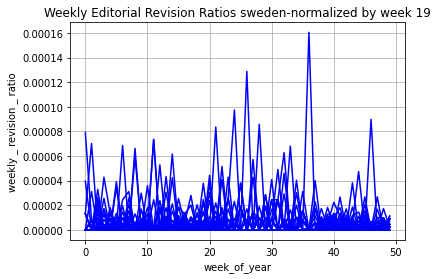

In [108]:
ax = plt.gca()

plt.plot(array_weekly_ratios_sweden_2019_weeklyyearlynorm, color='blue') 
plt.title('Weekly Editorial Revision Ratios sweden-normalized by week 19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()

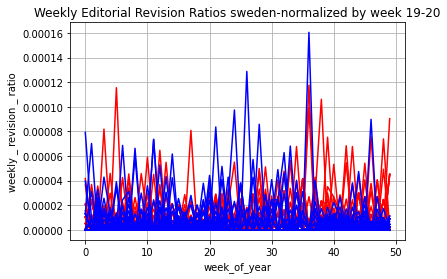

In [109]:
ax = plt.gca()

plt.plot(array_weekly_ratios_sweden_2020_weeklyyearlynorm, color='red') 
plt.plot(array_weekly_ratios_sweden_2019_weeklyyearlynorm, color='blue')


plt.title('Weekly Editorial Revision Ratios sweden-normalized by week 19-20')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()


### After outlier removal
### Let's remove the outliers from yearly_weekly_normalized data and find the correaltion again

In [110]:
#without_outlier_array_weekly_ratios_sweden_2019=np.zeros((50,168))



for j in range (10): #remove outlier n times  and plot after every time removed  - repeat outlier removal n times
    
    for i in range (50):
    
    
        maxvalue=np.max(array_weekly_ratios_sweden_2019_weeklyyearlynorm[i])
        getindex=np.where(array_weekly_ratios_sweden_2019_weeklyyearlynorm[i]== maxvalue)[0][0]
        if getindex+1 <168:
            array_weekly_ratios_sweden_2019_weeklyyearlynorm[i][getindex]=(array_weekly_ratios_sweden_2019_weeklyyearlynorm[i][getindex-1]+array_weekly_ratios_sweden_2019_weeklyyearlynorm[i][getindex+1])/2
      
   

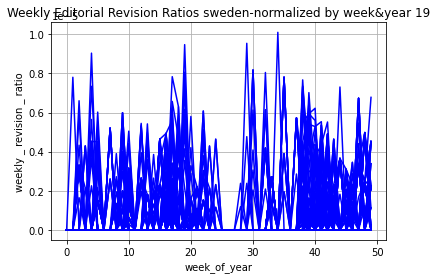

In [111]:
plt.plot(array_weekly_ratios_sweden_2019_weeklyyearlynorm, color='blue') 
plt.title('Weekly Editorial Revision Ratios sweden-normalized by week&year 19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()  

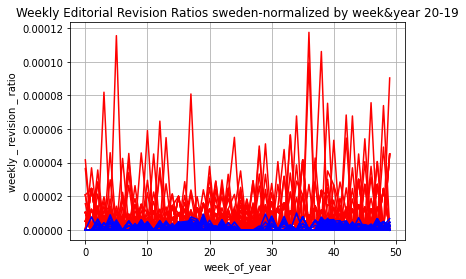

In [112]:
plt.plot(array_weekly_ratios_sweden_2020_weeklyyearlynorm, color='red')
plt.plot(array_weekly_ratios_sweden_2019_weeklyyearlynorm, color='blue') 
plt.title('Weekly Editorial Revision Ratios sweden-normalized by week&year 20-19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()  

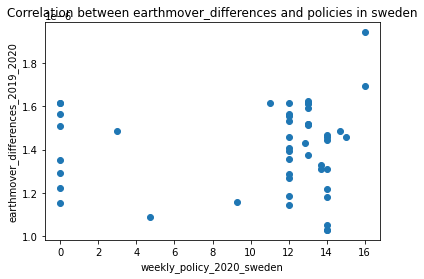

correlation and p_value are:  0.0805101793039342 0.5783493425656165


In [113]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_sweden_2019[i] and array_weekly_ratios_sweden_2020[i]  
#and append this difference to a list

#dependent variable

ex4_earthmover_differences= []
for i in range(len(array_weekly_ratios_sweden_2019)) :
    ex4_earthmover_differences.append(wasserstein_distance(array_weekly_ratios_sweden_2019_weeklyyearlynorm[i], array_weekly_ratios_sweden_2020_weeklyyearlynorm[i]))


plt.scatter(weekly_ratio_policy_2020_sweden, ex4_earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in sweden')
plt.xlabel('weekly_policy_2020_sweden')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(ex4_earthmover_differences, weekly_ratio_policy_2020_sweden)
print("correlation and p_value are: ", corr, p_value)


earth_correlations['ex4 : normalizedyearlyweekly_without_outlier10_earth']=corr



/Users/luna/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:1288: RuntimeWarning: invalid value encountered in true_divide
  p = p / np.sum(p, axis=0)


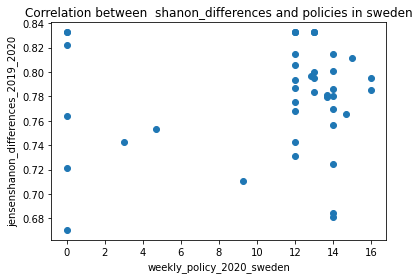

In [114]:

#jensen shanon divergence

ex4_jensenshanon_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_sweden_2019)) :
    ex4_jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_sweden_2019_weeklyyearlynorm[i], array_weekly_ratios_sweden_2020_weeklyyearlynorm[i]))
    
plt.scatter(weekly_ratio_policy_2020_sweden, ex4_jensenshanon_differences) 

plt.title('Correlation between  shanon_differences and policies in sweden')
plt.xlabel('weekly_policy_2020_sweden')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()






if "nan" or "inf" in ex4_jensenshanon_differences:
    corr, p_value = "nan", "nan"
    jensen_correlations['normalizedyearlyweekly_without_outlier10_jensen']="nan"

else:

    corr, p_value=stats.pearsonr(ex4_jensenshanon_differences, weekly_ratio_policy_2020_sweden)

    print("correlation and p_value are: ", corr, p_value)
    jensen_correlations['ex4 : normalizedyearlyweekly_without_outlier10_jensen']=corr



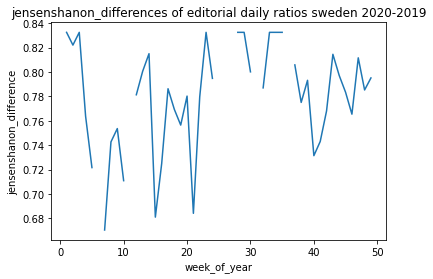

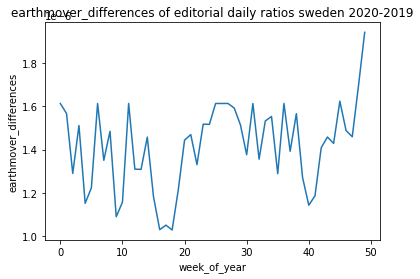

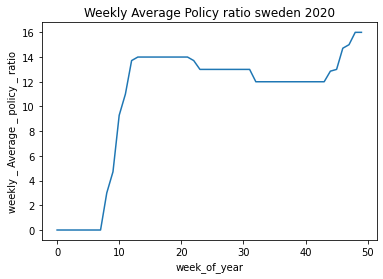

In [115]:


plt.plot(ex4_jensenshanon_differences) 
plt.title('jensenshanon_differences of editorial daily ratios sweden 2020-2019')
plt.ylabel('jensenshanon_difference')
plt.xlabel('week_of_year')
plt.show()


plt.plot(ex4_earthmover_differences) 
plt.title('earthmover_differences of editorial daily ratios sweden 2020-2019')
plt.ylabel('earthmover_differences')
plt.xlabel('week_of_year')
plt.show()


plt.plot(weekly_ratio_policy_2020_sweden)
plt.title('Weekly Average Policy ratio sweden 2020')
plt.ylabel('weekly _ Average _ policy _ ratio')
plt.xlabel('week_of_year')

plt.show()

## 3.4  EXPERIMENT 5: Smoothing 2019/2020 by moving average  
Test with window size 3 days

https://www.kite.com/python/answers/how-to-find-the-moving-average-of-a-list-in-python

### 2019

In [116]:
# We have 168 values - the window size is 72 = 3 days 
# --> each point in array of size 168 is replace by the average of 72 points around it

array_weekly_events_sweden_2019_50=array_weekly_events_sweden_2019[2:]


moving_average_weekly_ratios_sweden_2019=np.zeros((50,97))


for i in range (50):
            
        
    numbers = array_weekly_events_sweden_2019_50[i]
    window_size = 72



    j = 0
    moving_averages = []
    while j< 168 - window_size + 1:
            this_window = array_weekly_events_sweden_2019_50[i][j : j + window_size]


            window_average = sum(this_window) / window_size
            moving_averages.append(window_average)
            j += 1

    moving_average_weekly_ratios_sweden_2019[i]= np.asarray(moving_averages)

        

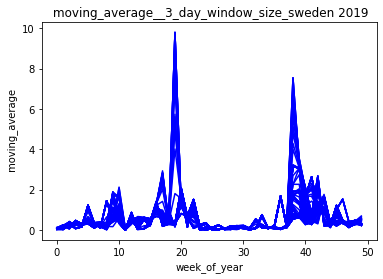

In [117]:
ax = plt.gca()
#plt.plot(array_weekly_events_sweden_2020_50) 
plt.plot( moving_average_weekly_ratios_sweden_2019, color='blue') 

plt.title(' moving_average__3_day_window_size_sweden 2019')
plt.ylabel(' moving_average')
plt.xlabel('week_of_year')
plt.show()

### 2020

In [118]:
# Moving average of 2020 -not ntcessary to smoothen 2020 so we dont run this cell

array_weekly_events_sweden_2020_50=array_weekly_events_sweden_2020[2:]

moving_average_weekly_ratios_sweden_2020=np.zeros((50,97))

for i in range (50):
            
        
    numbers = array_weekly_events_sweden_2020_50[i]
    window_size = 72



    j = 0
    moving_averages = []
    while j< 168 - window_size + 1:
            this_window = array_weekly_events_sweden_2020_50[i][j : j + window_size]

            window_average = sum(this_window) / window_size
            moving_averages.append(window_average)
            j += 1

    moving_average_weekly_ratios_sweden_2020[i]= np.asarray(moving_averages)

         

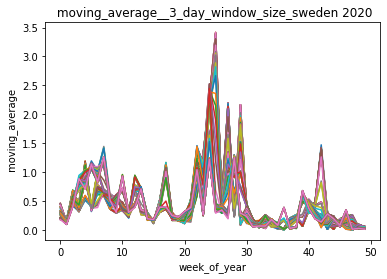

In [119]:
 
ax = plt.gca()
plt.plot( moving_average_weekly_ratios_sweden_2020) 
plt.title(' moving_average__3_day_window_size_sweden 2020')
plt.ylabel(' moving_average')
plt.xlabel('week_of_year')
plt.show()


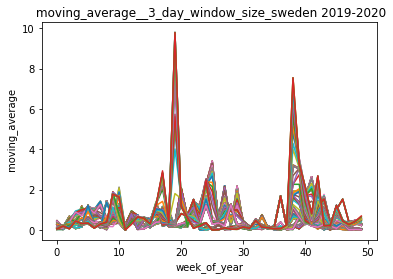

In [120]:

ax = plt.gca()
plt.plot( moving_average_weekly_ratios_sweden_2020) 
plt.plot( moving_average_weekly_ratios_sweden_2019) 

plt.title(' moving_average__3_day_window_size_sweden 2019-2020')
plt.ylabel(' moving_average')
plt.xlabel('week_of_year')

plt.show()


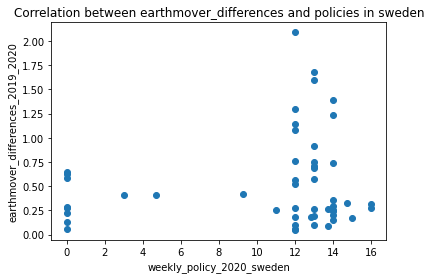

correlation and p_value are:  0.14053604488816443 0.3303308826574339


In [121]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_sweden_2019[i] and array_weekly_ratios_sweden_2020[i]  
#and append this difference to a list

#dependent variable

ex5_earthmover_differences= []
for i in range(len(array_weekly_ratios_sweden_2019)) :
    ex5_earthmover_differences.append(wasserstein_distance(moving_average_weekly_ratios_sweden_2019[i], moving_average_weekly_ratios_sweden_2020[i]))


plt.scatter(weekly_ratio_policy_2020_sweden, ex5_earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in sweden')
plt.xlabel('weekly_policy_2020_sweden')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(ex5_earthmover_differences, weekly_ratio_policy_2020_sweden)
print("correlation and p_value are: ", corr, p_value)


earth_correlations['ex5 : movingAverage_originalvalues_earth']=corr




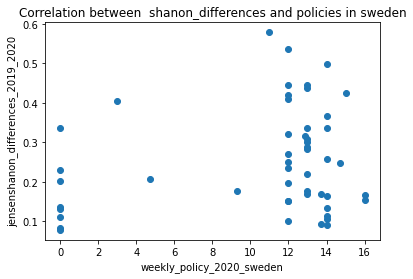

correlation and p_value are:  0.21385051921985054 0.1359047142580358


In [122]:

#jensen shanon divergence

ex5_jensenshanon_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_sweden_2019)) :
    ex5_jensenshanon_differences.append(distance.jensenshannon(moving_average_weekly_ratios_sweden_2019[i], moving_average_weekly_ratios_sweden_2020[i]))
    
plt.scatter(weekly_ratio_policy_2020_sweden, ex5_jensenshanon_differences) 

plt.title('Correlation between  shanon_differences and policies in sweden')
plt.xlabel('weekly_policy_2020_sweden')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()


corr, p_value=stats.pearsonr(ex5_jensenshanon_differences, weekly_ratio_policy_2020_sweden)
print("correlation and p_value are: ", corr, p_value)
jensen_correlations['ex5 : movingAverage_originalvalues_jensesn']=corr



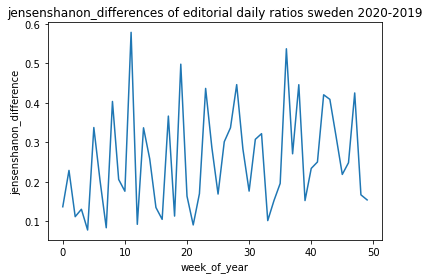

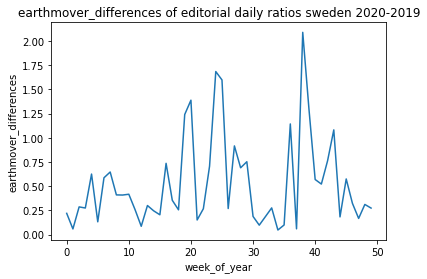

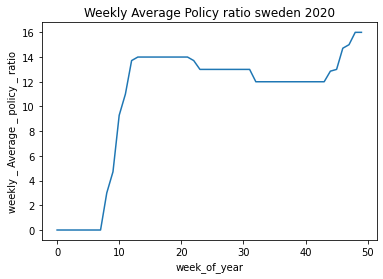

In [123]:


plt.plot(ex5_jensenshanon_differences) 
plt.title('jensenshanon_differences of editorial daily ratios sweden 2020-2019')
plt.ylabel('jensenshanon_difference')
plt.xlabel('week_of_year')
plt.show()


plt.plot(ex5_earthmover_differences) 
plt.title('earthmover_differences of editorial daily ratios sweden 2020-2019')
plt.ylabel('earthmover_differences')
plt.xlabel('week_of_year')
plt.show()


plt.plot(weekly_ratio_policy_2020_sweden)
plt.title('Weekly Average Policy ratio sweden 2020')
plt.ylabel('weekly _ Average _ policy _ ratio')
plt.xlabel('week_of_year')

plt.show()

### 3.4 Testing other measures of difference: Kullback-Leiber divergence

In [124]:
"""
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

kl_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_sweden_2019)) :
    kl_differences.append(kl_divergence(array_weekly_ratios_sweden_2019[i], array_weekly_ratios_sweden_2020[i]))
    

plt.scatter(weekly_ratio_policy_2020_sweden, kl_differences) 
plt.title('Correlation between Kullback_Leiber_differences and policies in sweden')
plt.xlabel('weekly_policy_2020_sweden')
plt.ylabel('Kullback_Leiber_differences_2019_2020')
plt.show()



corr, p_value=stats.pearsonr(kl_differences, weekly_ratio_policy_2020_sweden)
print("correlation and p_value are: ", corr, p_value)
"""


'\ndef kl_divergence(p, q):\n    return np.sum(np.where(p != 0, p * np.log(p / q), 0))\n\nkl_differences= []\n\n#print(extracted_daily_ratio_2020[1])\n\n\nfor i in range(len(array_weekly_ratios_sweden_2019)) :\n    kl_differences.append(kl_divergence(array_weekly_ratios_sweden_2019[i], array_weekly_ratios_sweden_2020[i]))\n    \n\nplt.scatter(weekly_ratio_policy_2020_sweden, kl_differences) \nplt.title(\'Correlation between Kullback_Leiber_differences and policies in sweden\')\nplt.xlabel(\'weekly_policy_2020_sweden\')\nplt.ylabel(\'Kullback_Leiber_differences_2019_2020\')\nplt.show()\n\n\n\ncorr, p_value=stats.pearsonr(kl_differences, weekly_ratio_policy_2020_sweden)\nprint("correlation and p_value are: ", corr, p_value)\n'

## 3.5 Feature importance - feature selection - dimensionality reduction
#### Which policy indicators have the highest correlation with the editorial data?
### Let's first find out which experiments in each categories (earthmover & jensenshanon) gave the highest values:

In [125]:
max_key = max(earth_correlations, key=earth_correlations.get)
print(max_key, ' : ', earth_correlations[max_key])

#max_key = max(jensen_correlations, key=jensen_correlations.get)
#print(max_key, ' : ', jensen_correlations[max_key])

ex2 : normalizedyearlyweekly_earth  :  0.24154111021649383


In [126]:

# make up a new dataset consisting of IV and DV - add the earthmover as a column to the policy data set  


edit_and_policy= weekly_policy_2020_sweden_indicators_ratio
edit_and_policy['jensenshanon_differences']=ex1_jensenshanon_differences
edit_and_policy['earthmover_differences']=ex5_earthmover_differences


edit_and_policy.head(10)


,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_transportation,weekly_home,weekly_movement,weekly_travel,weekly_sum,jensenshanon_differences,earthmover_differences
week_of_year,,,,,,,,,,,
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.807946,0.219931
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.806070,0.058849
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.825959,0.286512
5,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.826087,0.275057
6,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.746194,0.625573
7,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.740958,0.132446
8,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.802315,0.587199
9,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.656377,0.646907
10,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,3.0,3.000000,0.762982,0.410510


## 3.5.1  Correlation Heatmap

In [127]:
corr = edit_and_policy.corr()
corr.style.background_gradient(cmap ='coolwarm')


,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_transportation,weekly_home,weekly_movement,weekly_travel,weekly_sum,jensenshanon_differences,earthmover_differences
weekly_school,1.000000,0.696420,0.783909,0.773422,0.692448,0.759115,0.505873,0.721006,0.849920,0.026189,0.132224
weekly_workplace,0.696420,1.000000,0.842079,0.935759,0.782833,0.818384,0.509613,0.751343,0.901680,0.095431,0.052809
weekly_events,0.783909,0.842079,1.000000,0.975117,0.962330,0.980163,0.342667,0.876641,0.972735,0.135665,0.194106
weekly_gatherings,0.773422,0.935759,0.975117,1.000000,0.921946,0.947108,0.422683,0.874769,0.983594,0.123747,0.143316
weekly_transportation,0.692448,0.782833,0.962330,0.921946,1.000000,0.967941,0.260624,0.773230,0.906618,0.153812,0.216013
weekly_home,0.759115,0.818384,0.980163,0.947108,0.967941,1.000000,0.334368,0.817943,0.945443,0.187324,0.189462
weekly_movement,0.505873,0.509613,0.342667,0.422683,0.260624,0.334368,1.000000,0.337815,0.496120,-0.087200,-0.194936
weekly_travel,0.721006,0.751343,0.876641,0.874769,0.773230,0.817943,0.337815,1.000000,0.908175,0.080371,0.163573
weekly_sum,0.849920,0.901680,0.972735,0.983594,0.906618,0.945443,0.496120,0.908175,1.000000,0.101610,0.140536
jensenshanon_differences,0.026189,0.095431,0.135665,0.123747,0.153812,0.187324,-0.087200,0.080371,0.101610,1.000000,-0.049397


In [128]:
df_final=weekly_policy_2020_sweden_indicators_ratio.iloc[:,:8]
df_final.head()

,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_transportation,weekly_home,weekly_movement,weekly_travel
week_of_year,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


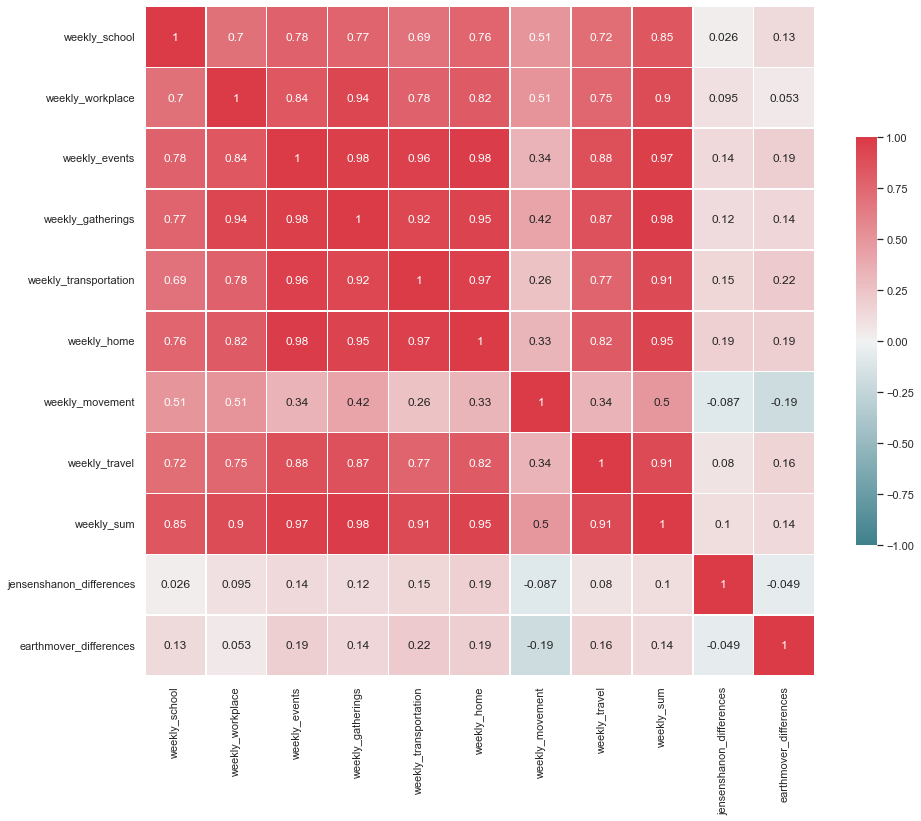

In [129]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(210, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## Pairwise correlations larger than 0.75

In [130]:
correlated_features = set()
dict_correlated_features = {}

correlation_matrix = corr  # let's drop the target value

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.75: #threshhold is 0.8 or can be lower
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
            dict_correlated_features[correlation_matrix.columns[i]]=correlation_matrix.columns[j]
            

In [131]:
print( "These questions highly correlated with each other ")
correlated_features
dict_correlated_features

These questions highly correlated with each other 


{'weekly_events': 'weekly_workplace',
 'weekly_gatherings': 'weekly_events',
 'weekly_home': 'weekly_transportation',
 'weekly_sum': 'weekly_travel',
 'weekly_transportation': 'weekly_gatherings',
 'weekly_travel': 'weekly_home'}

In [132]:

# Displaying the dictionary 
for key, value in dict_correlated_features.items(): 
    
    question1= key 
    question2= value 
    
    print('Q: {}, Q: {}'.format(question1, question2)) 


Q: weekly_events, Q: weekly_workplace
Q: weekly_gatherings, Q: weekly_events
Q: weekly_transportation, Q: weekly_gatherings
Q: weekly_home, Q: weekly_transportation
Q: weekly_travel, Q: weekly_home
Q: weekly_sum, Q: weekly_travel


## Jensen shanon correaltions plot

In [133]:


label_correlation = corr.sort_values(by='jensenshanon_differences', ascending=False)[['jensenshanon_differences']]
label_correlation = label_correlation.reset_index()
label_correlation.columns = ['Attribute', 'CorrelationWithjensenshanondifferences']
label_correlation = label_correlation.iloc[1: , :]
label_correlation = label_correlation.reset_index()
label_correlation.head()


,index,Attribute,CorrelationWithjensenshanondifferences
0,1,weekly_home,0.187324
1,2,weekly_transportation,0.153812
2,3,weekly_events,0.135665
3,4,weekly_gatherings,0.123747
4,5,weekly_sum,0.101610


In [134]:


label_correlation['color']='NAN' # create new column

for i in range (label_correlation.shape[0]):
    
    #label_correlation.questions[i]= str(label_correlation.Attribute[i])+": "+questions_dict[label_correlation.Attribute[i]]
    
    if (label_correlation.CorrelationWithjensenshanondifferences[i]<0):
        label_correlation.color[i] = "red"
    else:
        label_correlation.color[i] = "blue"

    

print(label_correlation.nlargest(10,'CorrelationWithjensenshanondifferences'))  #print 10 best features 



   index               Attribute  CorrelationWithjensenshanondifferences color
0      1             weekly_home                                0.187324  blue
1      2   weekly_transportation                                0.153812  blue
2      3           weekly_events                                0.135665  blue
3      4       weekly_gatherings                                0.123747  blue
4      5              weekly_sum                                0.101610  blue
5      6        weekly_workplace                                0.095431  blue
6      7           weekly_travel                                0.080371  blue
7      8           weekly_school                                0.026189  blue
8      9  earthmover_differences                               -0.049397   red
9     10         weekly_movement                               -0.087200   red


/Users/luna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/luna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


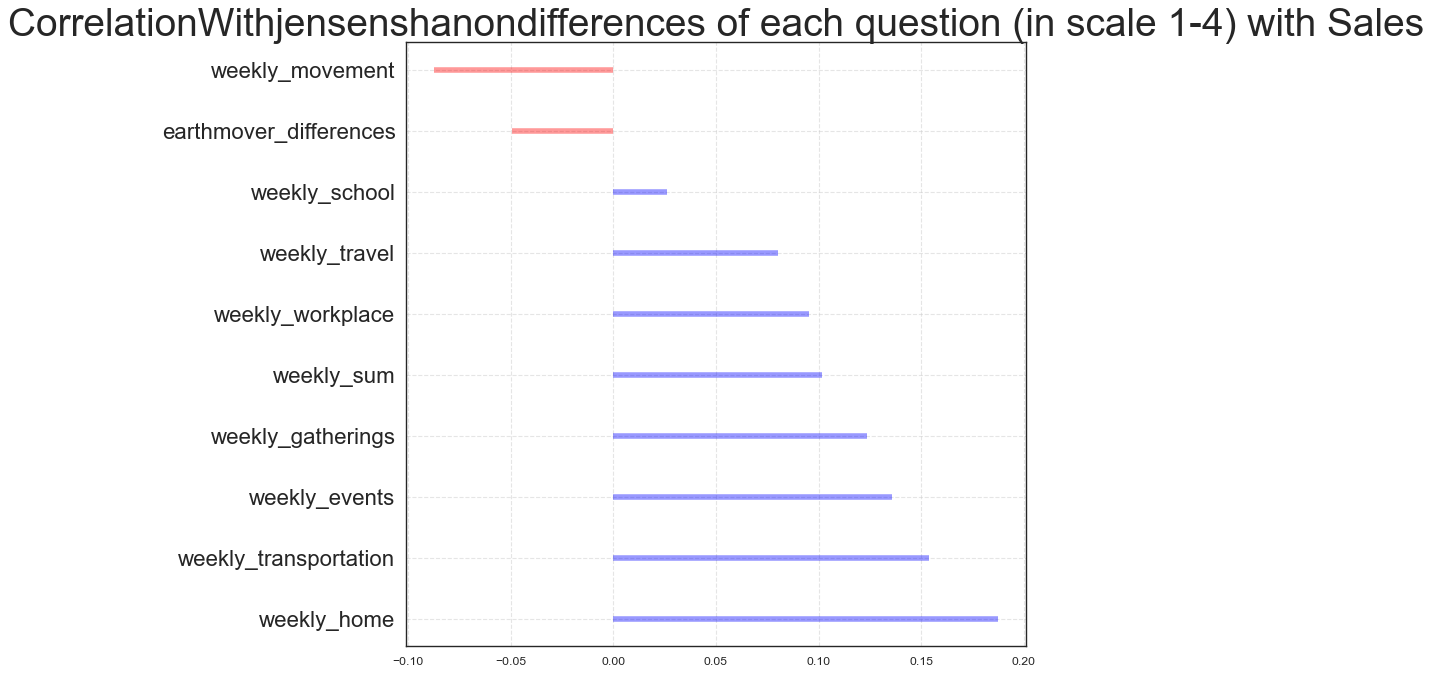

In [135]:
#label_correlation.sort_values("CorrelationWithPC1", inplace=True)

# Draw plot
plt.figure(figsize=(10, 10), dpi=80)
  
# Plotting the horizontal lines
plt.hlines(y=label_correlation.Attribute, xmin=0, xmax=label_correlation.CorrelationWithjensenshanondifferences,color=label_correlation.color,
          alpha=0.4, linewidth=5)
  
# Decorations
# Setting the labels of x-axis and y-axis
#plt.gca().set(ylabel='Quarter', xlabel='Sales')
  
# Setting Date to y-axis
plt.yticks(label_correlation.Attribute, fontsize=20)
  
# Title of Bar Chart
plt.title('CorrelationWithjensenshanondifferences of each question (in scale 1-4) with Sales', fontdict={
          'size': 35})
  
# Optional grid layout
plt.grid(linestyle='--', alpha=0.5)
  
# Displaying the Diverging Bar Chart
plt.show()

## Earthmover correaltions plot

In [136]:

label_correlation = corr.sort_values(by='earthmover_differences', ascending=False)[['earthmover_differences']]
label_correlation = label_correlation.reset_index()
label_correlation.columns = ['Attribute', 'CorrelationWithearthmoverdifferences']
label_correlation = label_correlation.iloc[1: , :]
label_correlation = label_correlation.reset_index()
label_correlation.head()




label_correlation['color']='NAN'

for i in range (label_correlation.shape[0]):
    
    #label_correlation.questions[i]= str(label_correlation.Attribute[i])+": "+questions_dict[label_correlation.Attribute[i]]
    
    if (label_correlation.CorrelationWithearthmoverdifferences[i]<0):
        label_correlation.color[i] = "red"
    else:
        label_correlation.color[i] = "blue"

print(label_correlation.nlargest(10,'CorrelationWithearthmoverdifferences'))  #print 10 best features 




   index                 Attribute  CorrelationWithearthmoverdifferences color
0      1     weekly_transportation                              0.216013  blue
1      2             weekly_events                              0.194106  blue
2      3               weekly_home                              0.189462  blue
3      4             weekly_travel                              0.163573  blue
4      5         weekly_gatherings                              0.143316  blue
5      6                weekly_sum                              0.140536  blue
6      7             weekly_school                              0.132224  blue
7      8          weekly_workplace                              0.052809  blue
8      9  jensenshanon_differences                             -0.049397   red
9     10           weekly_movement                             -0.194936   red


/Users/luna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/luna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


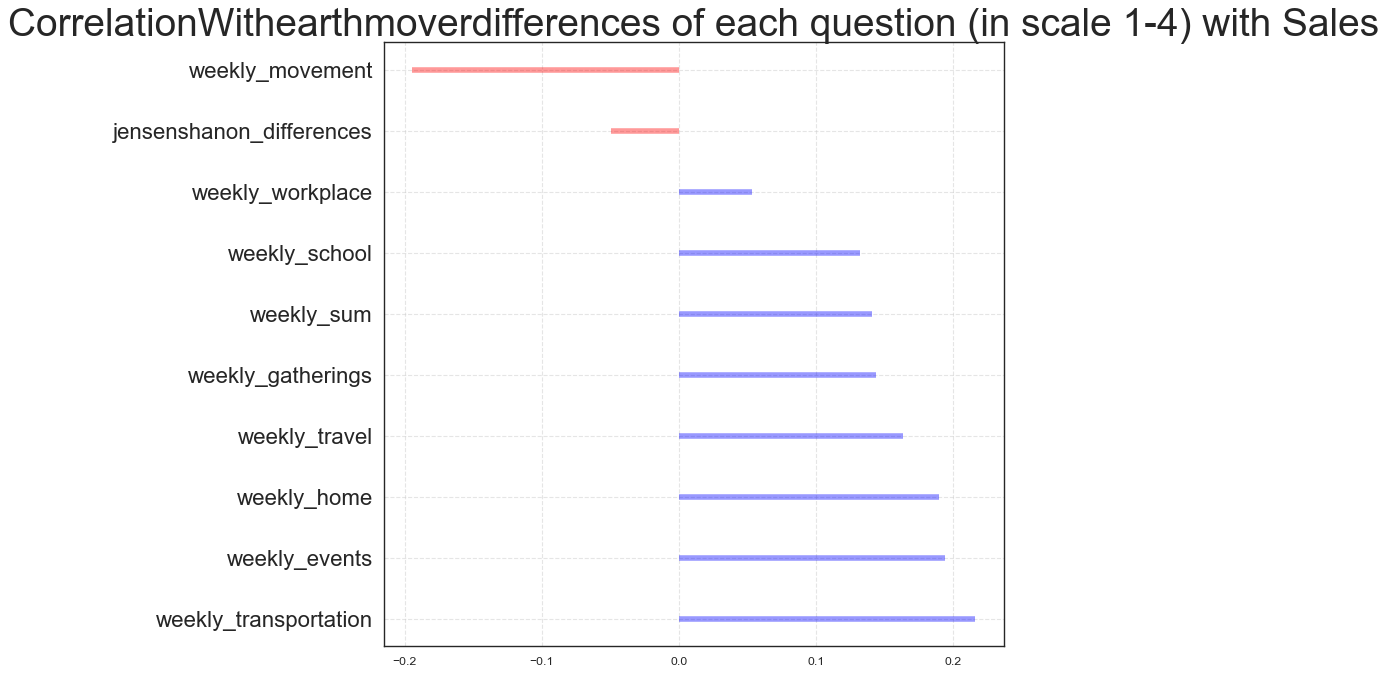

In [137]:


#label_correlation.sort_values("CorrelationWithPC1", inplace=True)

# Draw plot
plt.figure(figsize=(10, 10), dpi=80)
  
# Plotting the horizontal lines
plt.hlines(y=label_correlation.Attribute, xmin=0, xmax=label_correlation.CorrelationWithearthmoverdifferences,color=label_correlation.color,
          alpha=0.4, linewidth=5)
  
# Decorations
# Setting the labels of x-axis and y-axis
#plt.gca().set(ylabel='Quarter', xlabel='Sales')
  
# Setting Date to y-axis
plt.yticks(label_correlation.Attribute, fontsize=20)
  
# Title of Bar Chart
plt.title('CorrelationWithearthmoverdifferences of each question (in scale 1-4) with Sales', fontdict={
          'size': 35})
  
# Optional grid layout
plt.grid(linestyle='--', alpha=0.5)
  
# Displaying the Diverging Bar Chart
plt.show()

## 3.5.2 PCA

### 3.5.2.1 PCA calclations using the built in library

In [138]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Standardizing the features
x = StandardScaler().fit_transform(df_final)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf
 

,principal component 1,principal component 2
0,5.092713,0.203395
1,5.092713,0.203395
2,5.092713,0.203395
3,5.092713,0.203395
4,5.092713,0.203395
5,5.092713,0.203395
6,5.092713,0.203395
7,5.092713,0.203395
8,4.124429,-0.059410
9,3.471552,-0.231687


### Explained variance by the first and second PC

In [139]:
pca.explained_variance_ratio_


array([0.78266705, 0.11516939])

In [140]:
PC1=list(principalDf.iloc[:,0])

/Users/luna/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:1288: RuntimeWarning: invalid value encountered in true_divide
  p = p / np.sum(p, axis=0)


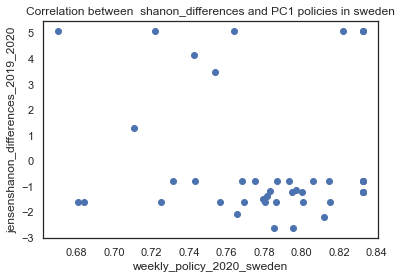

In [141]:

#jensen shanon divergence

jensenshanon_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_sweden_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_sweden_2019[i], array_weekly_ratios_sweden_2020[i]))
    
plt.scatter(jensenshanon_differences, PC1) 

plt.title('Correlation between  shanon_differences and PC1 policies in sweden')
plt.xlabel('weekly_policy_2020_sweden')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()




if "nan" or "inf" in jensenshanon_differences:
    corr, p_value = "nan", "nan"
    jensen_correlations['PC1_basic_jensen']="nan"

else:

    corr, p_value=stats.pearsonr(jensenshanon_differences, PC1)

    print("correlation and p_value are: ", corr, p_value)
    jensen_correlations['PC1_basic_jensen']=corr


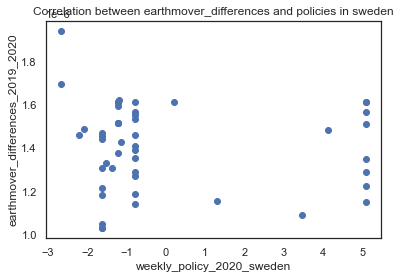

correlation and p_value are:  -0.09594545438242048 0.5074529546136749


In [142]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_sweden_2019[i] and array_weekly_ratios_sweden_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_sweden_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_sweden_2019_weeklyyearlynorm[i], array_weekly_ratios_sweden_2020_weeklyyearlynorm[i]))


plt.scatter(PC1, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in sweden')
plt.xlabel('weekly_policy_2020_sweden')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(earthmover_differences, PC1)
print("correlation and p_value are: ", corr, p_value)


earth_correlations['PC1_basic_earth']=corr



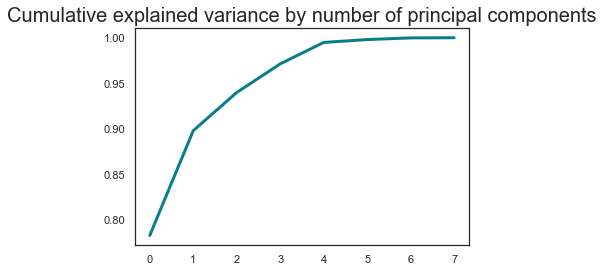

In [143]:


pca = PCA().fit(StandardScaler().fit_transform(df_final))

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [144]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(df_final.columns) + 1)],
    index=df_final.columns
)
loadings.head(20)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
weekly_school,-0.847907,0.202566,-0.468889,-0.114374,0.165214,-0.012517,0.006189,0.000909
weekly_workplace,-0.913526,0.120553,0.273299,0.083934,0.297380,-0.004242,0.032339,-0.010498
weekly_events,-0.990716,-0.159888,0.000141,-0.040205,-0.070058,0.015654,-0.077632,-0.023019
weekly_gatherings,-0.997687,-0.054264,0.108931,0.042194,0.063601,0.000400,-0.060295,0.027516
weekly_transportation,-0.937885,-0.253015,0.089254,-0.202186,-0.122574,-0.108211,0.034367,0.001268
weekly_home,-0.971168,-0.170429,0.030830,-0.149385,-0.095641,0.116280,0.047383,0.003819
weekly_movement,-0.480476,0.868501,0.095851,-0.033727,-0.157851,-0.003624,-0.001703,-0.000229
weekly_travel,-0.897270,-0.093419,-0.134425,0.411190,-0.136089,-0.012388,0.027690,-0.000686


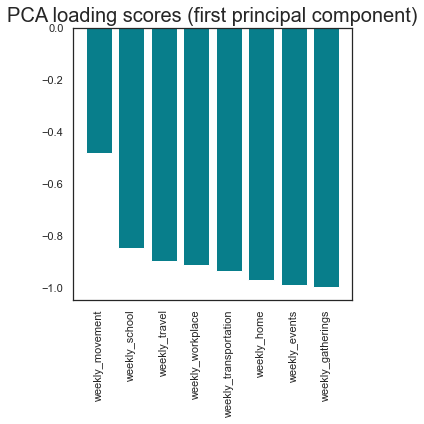

In [145]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']


f, ax = plt.subplots(figsize=(5, 5))


plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [146]:

pc1_loadings['color']='NAN'
for i in range (pc1_loadings .shape[0]):
    
    if (pc1_loadings.CorrelationWithPC1[i]<0):
        pc1_loadings.color[i] = "red"
    else:
        pc1_loadings.color[i] = "blue"

    

print(pc1_loadings .nlargest(10,'CorrelationWithPC1'))  #print 10 best features 




               Attribute  CorrelationWithPC1 color
0        weekly_movement           -0.480476   red
1          weekly_school           -0.847907   red
2          weekly_travel           -0.897270   red
3       weekly_workplace           -0.913526   red
4  weekly_transportation           -0.937885   red
5            weekly_home           -0.971168   red
6          weekly_events           -0.990716   red
7      weekly_gatherings           -0.997687   red


/Users/luna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


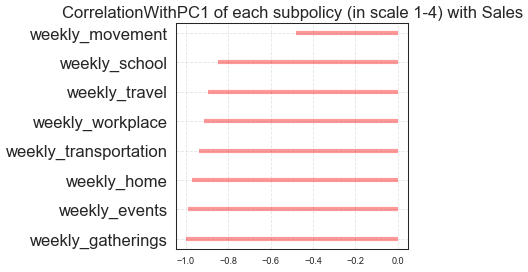

In [147]:
pc1_loadings.sort_values("CorrelationWithPC1", inplace=True)

# Draw plot
plt.figure(figsize=(5, 5), dpi=60)
  
# Plotting the horizontal lines
plt.hlines(y=pc1_loadings.Attribute, xmin=0, xmax=pc1_loadings.CorrelationWithPC1,color=pc1_loadings.color,
          alpha=0.4, linewidth=5)
  
# Decorations
# Setting the labels of x-axis and y-axis
#plt.gca().set(ylabel='Quarter', xlabel='Sales')
  
# Setting Date to y-axis
plt.yticks(pc1_loadings.Attribute, fontsize=20)
  
# Title of Bar Chart
plt.title('CorrelationWithPC1 of each subpolicy (in scale 1-4) with Sales', fontdict={
          'size': 20})
  
# Optional grid layout
plt.grid(linestyle='--', alpha=0.5)
  
# Displaying the Diverging Bar Chart
plt.show()

### 3.5.2.2 PCA calculations manually 

In [148]:

#1
df2_meaned=df_final.apply(lambda x:x-x.mean())
df2_meaned
#2 covariance
cov_mat =df2_meaned.cov()
cov_mat

,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_transportation,weekly_home,weekly_movement,weekly_travel
weekly_school,0.607114,0.279284,0.483582,0.748005,0.232037,0.246847,0.186656,0.624140
weekly_workplace,0.279284,0.264898,0.343132,0.597801,0.173278,0.175785,0.124207,0.429621
weekly_events,0.483582,0.343132,0.626814,0.958251,0.327663,0.323857,0.128471,0.771079
weekly_gatherings,0.748005,0.597801,0.958251,1.540658,0.492145,0.490612,0.248446,1.206297
weekly_transportation,0.232037,0.173278,0.327663,0.492145,0.184956,0.173728,0.053078,0.369446
weekly_home,0.246847,0.175785,0.323857,0.490612,0.173728,0.174169,0.066081,0.379242
weekly_movement,0.186656,0.124207,0.128471,0.248446,0.053078,0.066081,0.224248,0.177726
weekly_travel,0.624140,0.429621,0.771079,1.206297,0.369446,0.379242,0.177726,1.234286


In [149]:
eig_value, eig_vectors =np.linalg.eig(cov_mat)
#eig_vectors
sorted_index =np.argsort(eig_value)[::-1]
sorted_eigenvalue=eig_value[sorted_index]
sorted_eigenvector= eig_vectors[:,sorted_index]

In [150]:
n_components=2
eig_vector_subset=sorted_eigenvector[:,0:n_components]
X_reduced=np.dot(eig_vector_subset.transpose(), df2_meaned.transpose()).transpose()
principal_df2_two_dim=pd.DataFrame(X_reduced, columns=['PC1','PC2'])
print(principal_df2_two_dim)


         PC1       PC2
0   4.292253 -0.258464
1   4.292253 -0.258464
2   4.292253 -0.258464
3   4.292253 -0.258464
4   4.292253 -0.258464
5   4.292253 -0.258464
6   4.292253 -0.258464
7   4.292253 -0.258464
8   2.770085  1.119942
9   1.866035  1.176103
10  0.358776 -0.319830
11 -0.054168 -0.730664
12 -1.087581 -0.592857
13 -1.142420 -0.571873
14 -1.142420 -0.571873
15 -1.142420 -0.571873
16 -1.142420 -0.571873
17 -1.142420 -0.571873
18 -1.142420 -0.571873
19 -1.142420 -0.571873
20 -1.142420 -0.571873
21 -1.142420 -0.571873
22 -1.113352 -0.396024
23 -1.040682  0.043600
24 -1.040682  0.043600
25 -1.040682  0.043600
26 -1.040682  0.043600
27 -1.040682  0.043600
28 -1.040682  0.043600
29 -1.040682  0.043600
30 -1.040682  0.043600
31 -1.040682  0.043600
32 -0.722698  0.659988
33 -0.722698  0.659988
34 -0.722698  0.659988
35 -0.722698  0.659988
36 -0.722698  0.659988
37 -0.722698  0.659988
38 -0.722698  0.659988
39 -0.722698  0.659988
40 -0.722698  0.659988
41 -0.722698  0.659988
42 -0.72269

In [151]:
principal_df2_two_dim.var()

PC1    4.143420
PC2    0.275524
dtype: float64

In [152]:
PC1=list(principal_df2_two_dim.iloc[:,0])

/Users/luna/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:1288: RuntimeWarning: invalid value encountered in true_divide
  p = p / np.sum(p, axis=0)


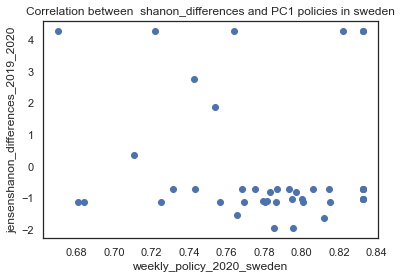

In [153]:

#jensen shanon divergence

jensenshanon_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_sweden_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_sweden_2019[i], array_weekly_ratios_sweden_2020[i]))
    
plt.scatter(jensenshanon_differences, PC1) 

plt.title('Correlation between  shanon_differences and PC1 policies in sweden')
plt.xlabel('weekly_policy_2020_sweden')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()

if "nan" or "inf" in jensenshanon_differences:
    corr, p_value = "nan", "nan"
    jensen_correlations['PC1_basic_jensen']="nan"

else:

    corr, p_value=stats.pearsonr(jensenshanon_differences, PC1)

    print("correlation and p_value are: ", corr, p_value)
    jensen_correlations['PC1_basic_jensen']=corr




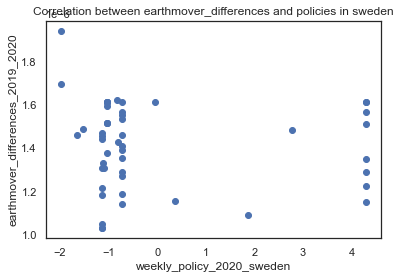

correlation and p_value are:  -0.08289547641000329 0.5671049527676978


In [154]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_sweden_2019[i] and array_weekly_ratios_sweden_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_sweden_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_sweden_2019_weeklyyearlynorm[i], array_weekly_ratios_sweden_2020_weeklyyearlynorm[i]))


plt.scatter(PC1, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in sweden')
plt.xlabel('weekly_policy_2020_sweden')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(earthmover_differences, PC1)
print("correlation and p_value are: ", corr, p_value)


earth_correlations['PC1_basic_earth']=corr



### 4. Results

In [155]:
print( "EARTH MOVER:\n")
for key, value in earth_correlations.items():
    print(key, ' : ', value)
    
print("\n")
print( "JENSEN SHANON:\n")

for key, value in jensen_correlations.items():
    print(key, ' : ', value)


EARTH MOVER:

ex1 : normalizedweekly_earth  :  0.1567406310013737
ex0 : normalizedyearly_earth  :  0.1748939596655673
ex2 : normalizedyearlyweekly_earth  :  0.24154111021649383
ex3 : without_outlier10_earth  :  0.09090171779943777
ex4 : normalizedyearlyweekly_without_outlier10_earth  :  0.0805101793039342
ex5 : movingAverage_originalvalues_earth  :  0.14053604488816443
PC1_basic_earth  :  -0.08289547641000329


JENSEN SHANON:

ex1 : normalizedweekly_jensen  :  0.10161001377269012
PC1_basic_jensen  :  nan
ex2 : normalizedyearlyweekly_jensen  :  0.10161001377269019
without_outlier10_jensen  :  nan
normalizedyearlyweekly_without_outlier10_jensen  :  nan
ex5 : movingAverage_originalvalues_jensesn  :  0.21385051921985054
